# DATA LINKS

Questions to answer and their corresponding data sets:

**HEALTH**

**1. Does eating organic food provide any health benefits over eating conventional (non-organic) food?**

* [1.1 - Fatty Acid Ratios in Milk](https://onlinelibrary.wiley.com/doi/full/10.1002/fsn3.610)

* [1.2 - Flavonoid and Antioxidant Counts](https://www.cambridge.org/core/journals/british-journal-of-nutrition/article/higher-antioxidant-and-lower-cadmium-concentrations-and-lower-incidence-of-pesticide-residues-in-organically-grown-crops-a-systematic-literature-review-and-metaanalyses/33F09637EAE6C4ED119E0C4BFFE2D5B1/core-reader)

* [1.3 - Deaths from Strengthened Bacterial Infections](https://www.cdc.gov/drugresistance/threat-report-2013/pdf/ar-threats-2013-508.pdf)

**2. Is the amount of pesticides used on conventional food harmful to us?** 

* [2.1 - EPA Harmful Level Detections for Pesticides in Produce](https://apps.ams.usda.gov/pdp).

**3. Which types of food products have the most/least pesticides used on them in the U.S.? Which types of pesticides are most/least prevalent?** 

* [3.1 - Pecticide Detection in Produce: Top-10 Pesticides and Top-10 Crops (Individual and Cumulative Years)](https://apps.ams.usda.gov/pdp).
    - Chose all commodities, all pesticides, and any year when generating the csv file (summary of findings, pos detects)
    
**COST**

**4. How do the prices for organic and conventional foods compare in the U.S.?**

* [4.1 - Price of Organic v.s. Conventional Produce from Retail Sellers](https://www.consumerreports.org/cro/news/2015/03/cost-of-organic-food/index.htm#table1).
    - Per serving size (pound, pint, oz, etc) 
    - Prices averaged from 8 select U.S. grocers

**SUSTAINABILITY**

**5. Is organic farming more sustainable than conventional farming?**

* [5.1 - Comparative analysis of environmental impacts of agricultural production systems, agricultural input efficiency, and food choice](https://iopscience.iop.org/article/10.1088/1748-9326/aa6cd5/data)

# CODE

Here is the general format for each dataset in each subsection:
    - Data Wrangling
        - Anything involved with extrating and cleaning the data before being able to graph it
    - Data Visualization 
        - Plots of the data from variables generated during data wrangling
    - Data Analysis
        - Discussion of the outcomes of the data and how it answers the question(s) being asked about section

**NOTE: We used Adobe Acrobat's "PDF to Excel" converter to transform pdf data to Excel that we could then access.** 

# HEALTH

## 1. Does eating organic food provide any health benefits over conventional (non-organic) food? 

One of this biggest factors contributing to the rise of organic food consumption over conventional food is the belief that organic food is healthier than conventional food. In order to shed some light on this issue, this section examines whether organic food provides various health benefits over conventional food. These benefits include increased fatty acid ratios, increased flavonoid and antioxidant counts, and less exposure to antibiotic resistant bacteria. Through presentation of data related to these topics, we can quantitatively analyze the postive impact organic food does, or does not, have on our health in comparison to conventional food. 

### 1.1 - Fatty Acid Ratios in Milk

We first take a look at data which measures the ratios for various important fatty acids in both organic and conventional milk. 

#### Data Wrangling

To start, we import various Python libraries needed for the work done below. 

In [372]:
# Import necessary libraries 
import xlrd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next, we store the Excel file for the milk data in a local variable. Here, we have already combed through the Excel file to make sure the cells for the data we are going to access are preserved well after being converted from PDF to Excel. Typical  errors that we fix include joined cells of data (separated out) and additional rows of data from parsing text spacing incorrectly (deleted).

In [373]:
# Imports the xlsx file and verifies it is the correct data with title and number of sheets
path_to_milk_data = os.path.join('Data', '1', 'Milk', 'Benbrook_et_al-2018-Food_Science_&_Nutrition.xlsx')

workbook = xlrd.open_workbook(path_to_milk_data)
sheet = workbook.sheets()[0]

Now we begin to wrangle the data into dataframes which we can then graph during the data visualization step. 

We grab the sheet row values for the range in which the desired table is pictured. 

In [374]:
data_rows = [sheet.row_values(r) for r in range(157, 178)]

After that, we clean the rows of any unnecessary space characters, as well as unwanted rows. The two unwanted rows here are deleted because their values are too small to show on the graphs below. We separate out the various types of data from the rows into separate arrays so they can be easily accessed from graphing. 

In [375]:
cleaned_rows = []
counter = 0
for row in data_rows:
    new_row = []
    for item in row:
        if item == '':
            continue
        new_row.append(item)
        if len(new_row) == 3:
            break
    counter += 1
    cleaned_rows.append(new_row)

titles = []
conventional = []
organic = []

for row in cleaned_rows:
    if len(row) > 1 and row[0] != '20:5 eicosapentae-        0.0025 noic, EPA' and row[0] != '22:5 docosapentae-       0.0037':
        titles.append(row[0])
        conventional.append(float(row[1]))
        organic.append(float(row[2]))
    else:
        continue

Additional separation of values is done so that the dataframes needed for graphing can be successfully formed.  

In [376]:
conventionalIndiv = []
organicIndiv = []
titlesIndiv = []
conventionalTotal = []
organicTotal = []
titlesTotal = []
conventionalRatio = []
organicRatio = []
titlesRatio = []

for index, name in enumerate(titles):
    if 'Total' in name or 'acids' in name:
        titlesTotal.append(name)
        conventionalTotal.append(conventional[index])
        organicTotal.append(organic[index])
    elif '/' in name:
        titlesRatio.append(name)
        conventionalRatio.append(conventional[index])
        organicRatio.append(organic[index])
    else:
        titlesIndiv.append(name)
        conventionalIndiv.append(conventional[index])
        organicIndiv.append(organic[index])

dfIndiv = pd.DataFrame({'Conventional': conventionalIndiv,
                   'Organic': organicIndiv}, index=titlesIndiv)

dfTotal = pd.DataFrame({'Conventional': conventionalTotal,
                   'Organic': organicTotal}, index=titlesTotal)

dfRatio = pd.DataFrame({'Conventional': conventionalRatio,
                   'Organic': organicRatio}, index=titlesRatio)

dfIndiv = dfIndiv.sort_values('Conventional', ascending=False)
dfTotal = dfTotal.sort_values('Conventional', ascending=False)
dfRatio = dfRatio.sort_values('Conventional', ascending=False)

#### Data Visualization

Now that we have the data frames we need, we can plot the data with several bar gaphs.

The first graph below compares the fatty acid content in organic and conventional milk for individual types of fatty acids. The results are measured using grames of fatty acid per 100 grams of milk. 

Text(0.5, 1.0, 'Individual Fatty Acids in whole milk - Conventional v.s. Organic')

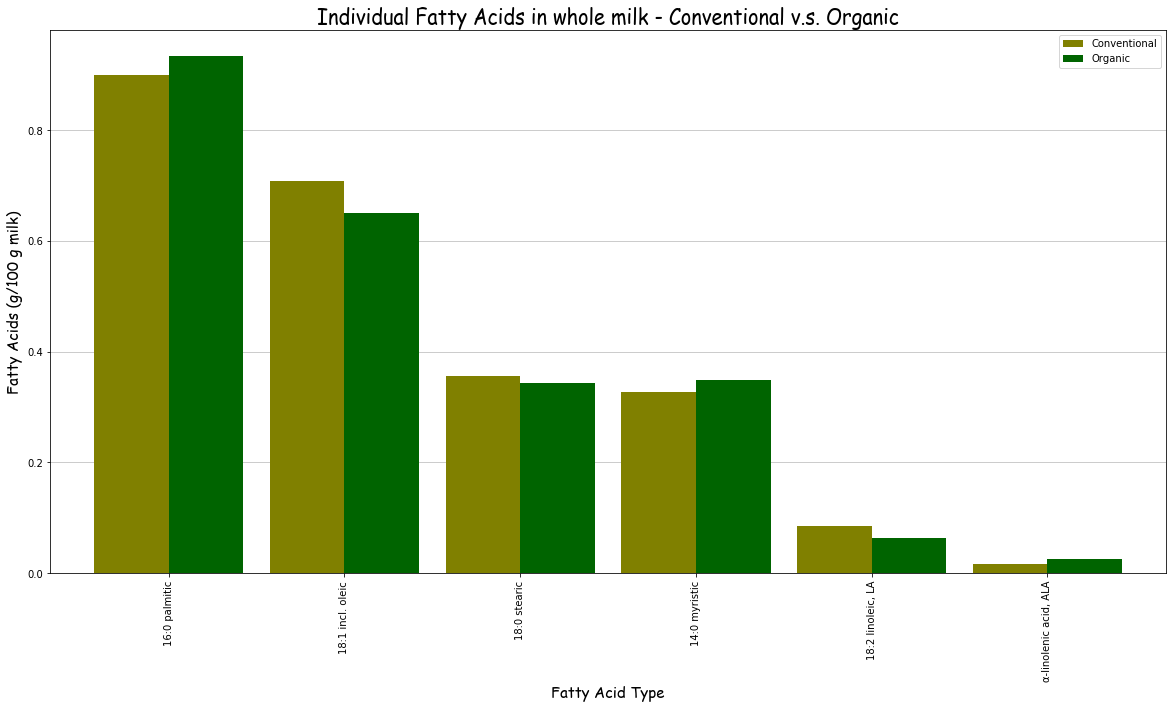

In [377]:
fig, ax = plt.subplots()
dfIndiv.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#808000", "#006400"]) 
ax.set_xlabel("Fatty Acid Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Fatty Acids (g/100 g milk)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Individual Fatty Acids in whole milk - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

From left to right:

- 16:0 palmitic -> Saturated fatty acid with 16-carbon backbone
- 18:1 incl. oleic -> Monosaturated omega-9 with lipid number (carbon count) of 18:1 cis-9
- 18:0 stearic -> Saturated fatty acid with 18-carbon backbone
- 14:0 myristic -> Saturated fatty acid with 14 carbon backbone
- 18:2 linoleic, LA -> omega-6 fatty acid with lipid number of 18:2
- a-linolenic acid, ALA -> omega-3 fatty acid

The second graph shows the totals across all fatty acid groups.

Text(0.5, 1.0, 'Total Fatty Acids in whole milk - Conventional v.s. Organic')

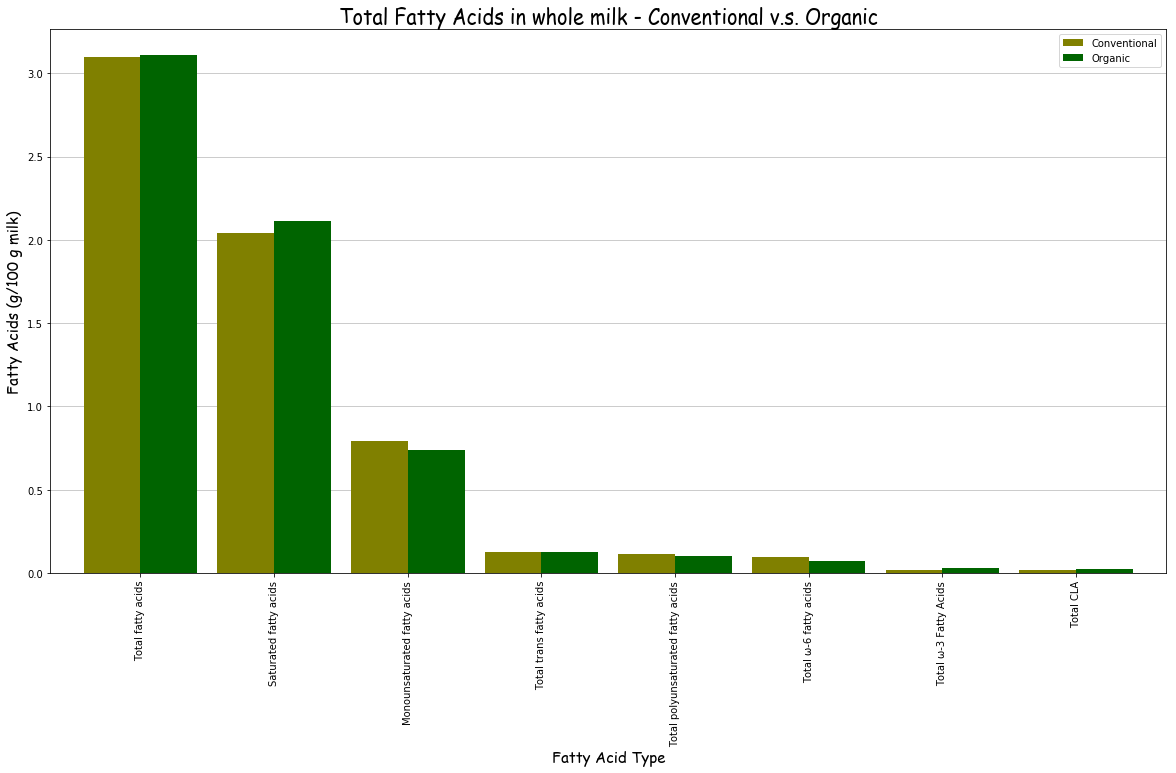

In [378]:
fig, ax = plt.subplots()
dfTotal.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#808000", "#006400"]) 
ax.set_xlabel("Fatty Acid Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Fatty Acids (g/100 g milk)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Total Fatty Acids in whole milk - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

The third graph show the ratios of important fatty acid groups. 

Text(0.5, 1.0, 'Ratios of Fatty Acids in whole milk - Conventional v.s. Organic')

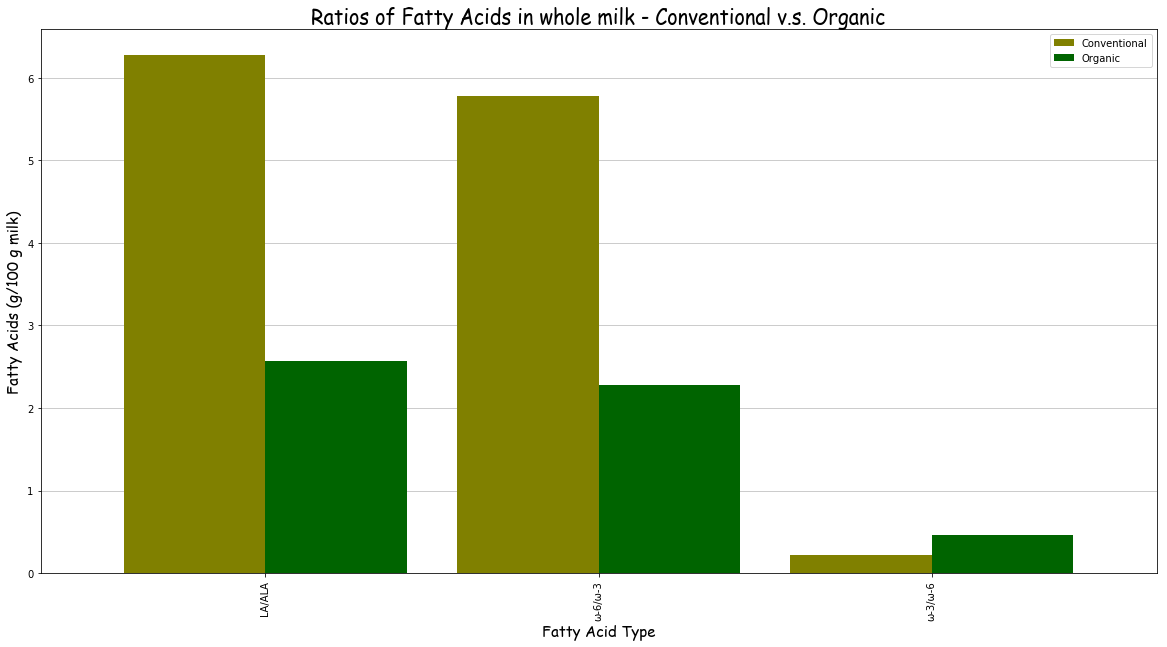

In [379]:
fig, ax = plt.subplots()
dfRatio.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#808000", "#006400"]) 
ax.set_xlabel("Fatty Acid Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Fatty Acids (g/100 g milk)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Ratios of Fatty Acids in whole milk - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

We now discuss the results of the data to determine whether organic or conventional milk contains more or less fatty acids. (etc)

Essential Fatty Acids (EFAs) in general are essential nutrients that play a large role in keeping our cells healthy and avoid chronic, life-threatening diseases (see https://www.tandfonline.com/doi/full/10.1080/19390210902861841). We cannot create EFAs in the body ourselves, so we must intake them from the foods we eat. Therefore, it is important that the food we eat is not lacking in levels of these fatty acids. 

Some of the more critical fatty acids in terms of their impact on our health are omega-3 (w-3) and omega-6 (w-6) fatty acids. It is crucial that we keep a balanced ratio between ingesting w-3 and w-6 acids, as an increased w-6 / w-3 ratio has been shown to cause cellular structure deformation that can lead to loss of function and disease. It is clear from chart 3 above that the ratio of w-6 to w-3 acids is much worse in conventional food versus organic food. Let us examine exactly how much more below:

In [380]:
omega6v3Conv = conventionalRatio[1]   
omega6v3Org = organicRatio[1]

ratio = omega6v3Conv / omega6v3Org
print("Conventional produce on average has a omega-6 / omega-3 ratio that is " + (str((ratio - 0.006906854130053))) + " times the omega-6 / omega-3 ratio found on average in Organic produce!")

Conventional produce on average has a omega-6 / omega-3 ratio that is 2.53 times the omega-6 / omega-3 ratio found on average in Organic produce!


Linoleic acid (LA) is an important w-6 acid, while a-lenolenic acid (ALA) is an important w-3 acid. Let's also examine the ratio of LA/ALA in conventional foodersus organic food:

In [381]:
omega6v3Conv = conventionalRatio[0]   
omega6v3Org = organicRatio[0]

ratio = omega6v3Conv / omega6v3Org
print("Conventional produce on average has a LA / ALA ratio that is " + (str(ratio - 0.0023676012461057)) + " times the LA / ALA ratio found on average in Organic produce!")

Conventional produce on average has a LA / ALA ratio that is 2.44 times the LA / ALA ratio found on average in Organic produce!


Unfortunately, the data exhibited for the rest of the fatty acid content shows no trend towards preferring organic or conventional foods. As shown in particular by the total number of fatty acids for each type of food, there is not much change in value between either types. Additionally, these counts are only based on one professional study and for one type of food product containing fatty acids, so it is not fair to say that this data is representative for all types of Organic and Conventional produce. However, research has shown that the reason behind the higher w-6 / w-3 and LA / ALA ratios seen here is due to conventionally-based cows eating less nutritious foods in comparison to their organically-based counterparts, thus producing less nutritious milk. Therefore, we can make an educated assumption that other conventionally-based animals who help produce foods that are high in EFAs may encounter the same issue, making organic foods seem like the healthier option for this scenario. 

### 1.2 - Flavonoid and Antioxidant Counts

We now take a look at the flavonoid and antioxidant counts in organic versus conventional food samples.  

#### Data Wrangling

We grab the correct path to the data so that we can load it into a local xlrd workbook. 

In [382]:
# Imports the xlsx file and verifies it is the correct data with title and number of sheets
path_to_flavoAnti_data = os.path.join('Data', '1', 'FlavoAnti', 'urn_cambridge.org_id_binary_20161006161346878-0147_S0007114514001366_S0007114514001366sup001.xlsx')

workbook = xlrd.open_workbook(path_to_flavoAnti_data)
sheet = workbook.sheets()[0]

Next, we merge the two sections of the data we need for graphing into one.

In [383]:
data_rowsA = [sheet.row_values(r) for r in range(870, 890)]
data_rowsB = [sheet.row_values(r) for r in range(894, 912)]
data_rowsB
for r in data_rowsB:
    data_rowsA.append(r)
data_rows = data_rowsA

Now that we have all the data stored in one local array, we clean the data of space characters.

In [384]:
cleaned_rows = []
counter = 0
for row in data_rows:
    new_row = []
    for item in row:
        if item == '':
            continue
        new_row.append(item)
    counter += 1
    cleaned_rows.append(new_row)

There are cetain rows in the data which we would prefer to graph due to their importance, so we grab these more relevant rows.

In [385]:
wanted_rows = ['Antioxidant activity', 'Phenolic compounds', 'Flavonoids (total)', 'Phenolic acids (total)', 
               'Flavones and flavonols§', 'Anthocyanins (total)', 'Carotenoids (total)', 'Xanthophylls', 
               'Carbohydrates (total)', 'Protein (total)', 'Nitrogen (N)', 'Cadmium (Cd)']

final_rows = []

for row in cleaned_rows:
    if row[0] in wanted_rows:
        final_rows.append(row)

To finish up, we separate out the needed values fr graphing and store them in a data frame. 

In [386]:
nutrientName = []
orgHigher = []
convHigher = []

for i in final_rows:
    nutrientName.append(i[0])
    orgHigher.append(i[5])
    convHigher.append(i[6])

df1 = pd.DataFrame({'Conventional' :  convHigher,
                   'Organic' : orgHigher},
                    index = nutrientName) 

df1 = df1.sort_values('Conventional', ascending=False)

#### Data Visualization

The graph below compares nutrient types with the respective number of comparisons from relevant studies on organic v.s. conventional produce reporting nutrient counts higher or lower. 

Text(0.5, 1.0, 'Flavonoid, Antioxidant, and Other Nutrient Activity - Conventional v.s. Organic')

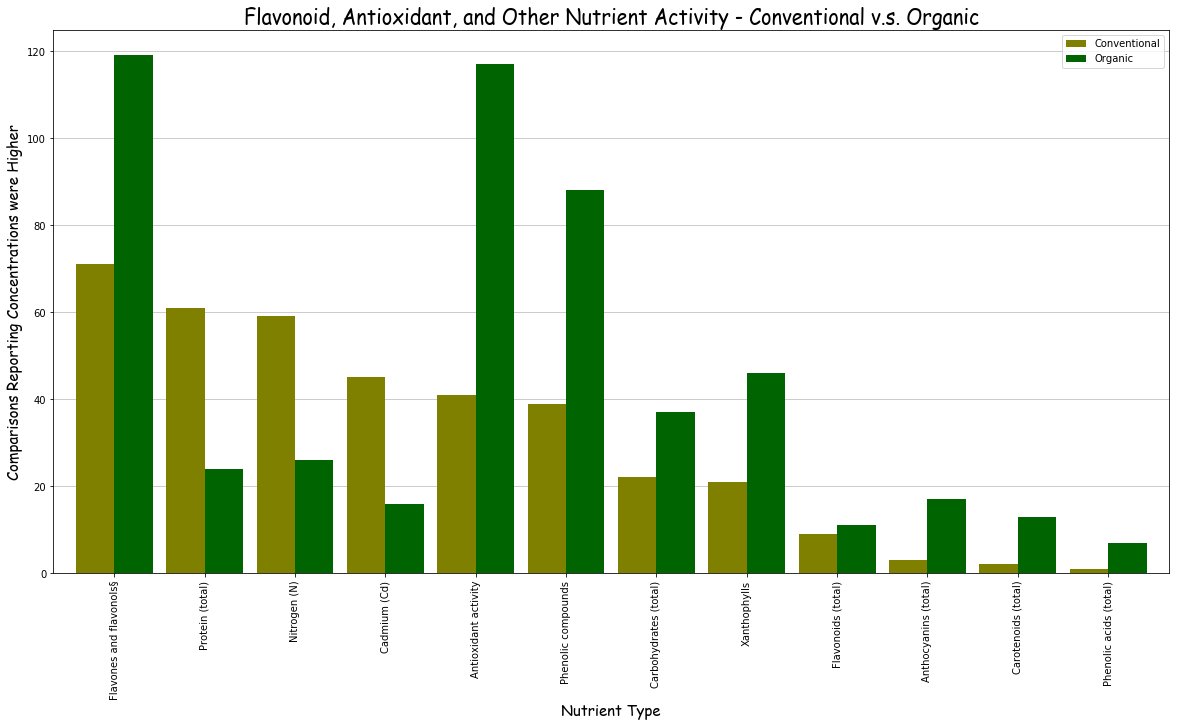

In [387]:
fig, ax = plt.subplots()
df1.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#808000", "#006400"]) 
ax.set_xlabel("Nutrient Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Comparisons Reporting Concentrations were Higher", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Flavonoid, Antioxidant, and Other Nutrient Activity - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

From the bar graph above, we can see immediately that the amount of antioxidant activity, Phenolic compunds, and flavonoid counts reported in studies to be higher in organic food is significantly more than the studies reporting hgher levels in  conventional food:

In [388]:
antiOrg = orgHigher[0]
antiConv = convHigher[0]
antiTotal = antiOrg + antiConv
pheOrg = orgHigher[1]
pheConv = convHigher[1]
pheTotal = pheOrg + pheConv
flavOrg = orgHigher[4]
flavConv = convHigher[4]
flavTotal = flavOrg + flavConv

print("Organic food was reported to have more antioxidant activity than conventional food in " + str(int((antiOrg/antiTotal)*100)) + "% of the studies.")
print("Organic food was reported to have more phelonic compounds than conventional food in " + str(int((pheOrg/pheTotal)*100)) + "% of the studies.")
print("Organic food was reported to have more flavonoids than conventional food in " + str(int((flavOrg/flavTotal)*100)) + "% of the studies.")

Organic food was reported to have more antioxidant activity than conventional food in 74% of the studies.
Organic food was reported to have more phelonic compounds than conventional food in 69% of the studies.
Organic food was reported to have more flavonoids than conventional food in 62% of the studies.


These nutrients help lower the risk of developing chronic, life-threatening diseases such as heart disease, cancer, and diabetes above all other nutrients listed in the graph above due to the effect they have on the health of our cells. Due to a majority of the studies reporting higher counts of these essential nutrients in organic food, this could suggest that oganic food is a healthier option than conventional food. 

Interestingly, however, the results also show a higher number of studies reporting higher concentrations of protein in conventional food versus orgaqnic food:

In [389]:
protOrg= orgHigher[9]
protConv = convHigher[9]
protTotal = protOrg + protConv

print("Conventional food was reported to have more protein than organic food in " + str(int((protConv/protTotal)*100)) + "% of the studies.")

Conventional food was reported to have more protein than organic food in 71% of the studies.


Depending on the person, protein maybe more important than antioxidant and flavonoid counts, so conventional food may still be the preferred option for them. Nevertheless, the graph above provides a compelling argument to choose organic over conventional produce.  

### 1.3 - Deaths from Strengthened Bacterial Infections

We now move on to examining the annual deaths related to antibiotic resistnat bacteria, which conventional methods of food production help create and foster.

#### Data Wrangling

We start by storing a local xlrs workbook correspoing to the bacteria data excel file.

In [390]:
# Imports the xlsx file and verifies it is the correct data with title and number of sheets
path_to_bacteria_data = os.path.join('Data', '1', 'Bacteria', 'ar-threats-2013-508.xlsx')

workbook = xlrd.open_workbook(path_to_bacteria_data)
sheet = workbook.sheets()[0]

Next, we store the rows of the xlrs sheet into an array.

In [391]:
data_rows = [sheet.row_values(r) for r in range(45, 65)]

We then clean the rows of the data so that they are cleaned of spaces.

In [392]:
cleaned_rows = []
counter = 0
for row in data_rows:
    new_row = []
    for item in row:
        if item == '':
            continue
        new_row.append(item)
    counter += 1
    cleaned_rows.append(new_row)

We only desire certain rows for graphing, so we create a new containing only those desired rows.

In [393]:
final_rows = []
totalRow = cleaned_rows[18]
extraRow = cleaned_rows[19]
strepRow = cleaned_rows[13]

for row in cleaned_rows[1:13]:
    final_rows.append(row)
for row in cleaned_rows[14:18]:
    final_rows.append(row)

To finish, we separate out the necessary data for graphing and create a data frame containing the separated data.

In [394]:
bacteriaName = []
numCases = []
numDeaths = []

bacteriaNameS = []
numCasesS = []
numDeathsS = []

for i in final_rows:
    bacteriaName.append(i[0])
    if i[3] == '<5':
        numCases.append(0)
    else:
        numCases.append(float(i[3]))
    if i[4] == '<5':
        numDeaths.append(0)
    else:
        numDeaths.append(float(i[4]))
        
bacteriaNameS.append(strepRow[0])
numCasesS.append(strepRow[3])
numDeathsS.append(strepRow[4])

df1 = pd.DataFrame({'Number of Cases' :  numCases,
                   'Number of Deaths' : numDeaths},
                    index = bacteriaName)
strepDF = pd.DataFrame({'Number of Cases' :  numCasesS,
                   'Number of Deaths' : numDeathsS},
                    index = bacteriaNameS)
df1 = df1.sort_values('Number of Cases', ascending=False)
strepDF = strepDF.sort_values('Number of Cases', ascending=False)

#### Data Visualization

In the graph below, for each type of bacteria we list the respective morbitity and mortality rates in the U.S. for 2013.

Text(0.5, 1.0, 'Minimum Estimates of Morbidity and Morality from Antibiotic-Resistant Infections - 2013')

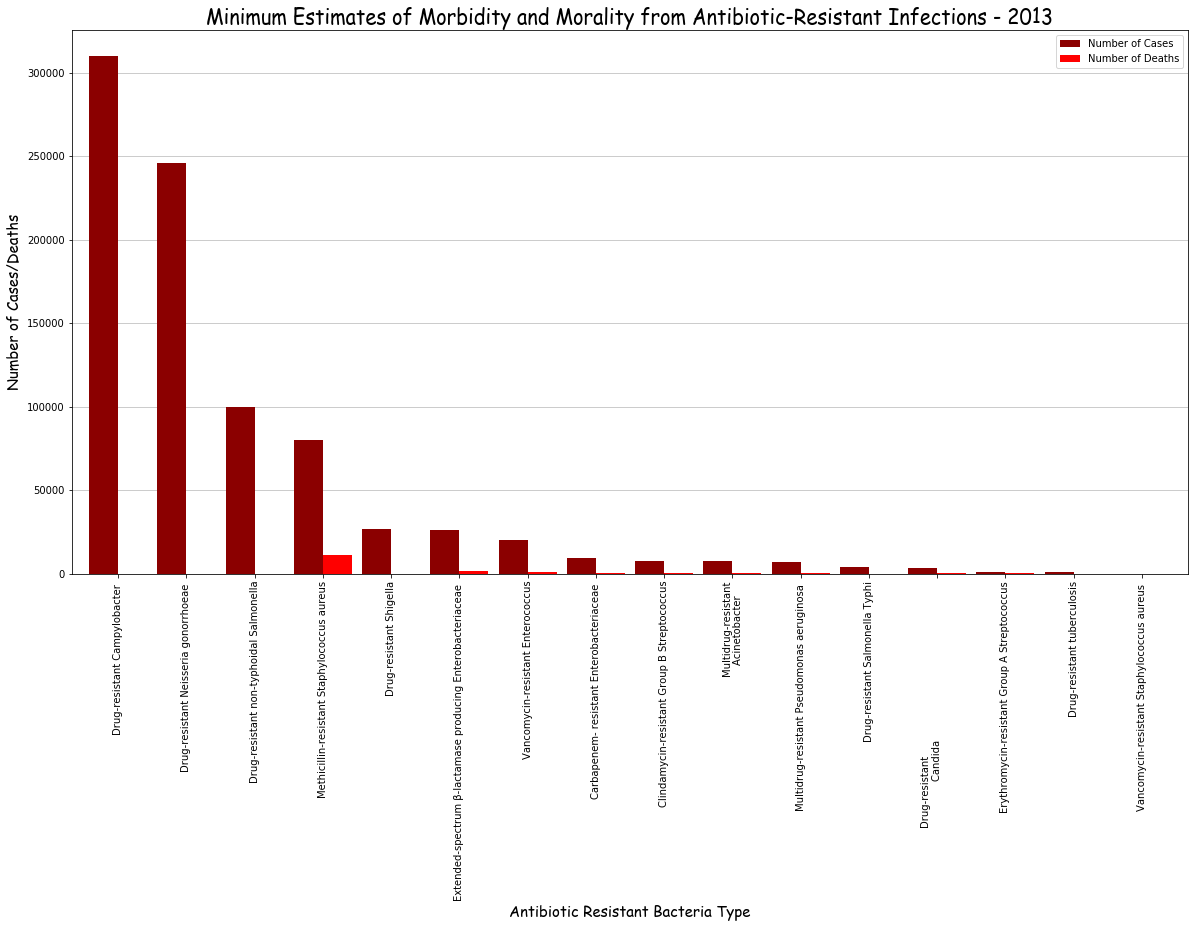

In [395]:
fig, ax = plt.subplots()
df1.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#8B0000", "#FF0000"]) 
ax.set_xlabel("Antibiotic Resistant Bacteria Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Cases/Deaths", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Minimum Estimates of Morbidity and Morality from Antibiotic-Resistant Infections - 2013', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Minimum Estimates of Morbidity and Morality from Antibiotic-Resistant Infections - 2013 (cont.)')

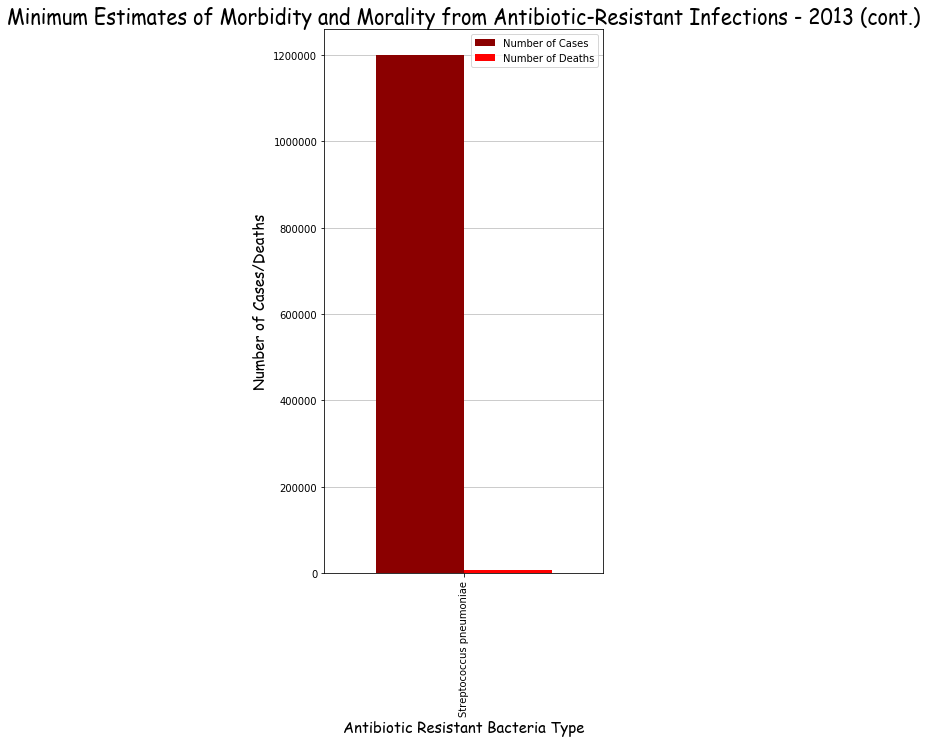

In [396]:
fig, ax = plt.subplots()
strepDF.plot(kind='bar', ax=ax, figsize=(5, 10), width=0.85, zorder = 3, color = ["#8B0000", "#FF0000"]) 
ax.set_xlabel("Antibiotic Resistant Bacteria Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Cases/Deaths", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Minimum Estimates of Morbidity and Morality from Antibiotic-Resistant Infections - 2013 (cont.)', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

Antibitic-resistance in bacterial infections is a highly important issue because common infections that normally can be cured with antibiotic prescriptions are becoming more uncurable. The above graph shows a very large number of cases reported for infections from antibiotic resistant bacteria, especially for the streptococcus pneumoniae strain, with a smaller number of deaths: 

In [397]:
totalCases = 0
totalDeaths = 0

for case in numCases:
    totalCases += case
for death in numDeaths:
    totalDeaths += death
for case in numCasesS:
    totalCases += case
for death in numDeathsS:
    totalDeaths += death
    
print("In 2013, a total of " + str(int(totalCases)) + " cases of infections caused by antibiotic-resistant bacteria were reported, with " + str(int(totalDeaths)) + " deaths total from those infections.")

In 2013, a total of 2049442 cases of infections caused by antibiotic-resistant bacteria were reported, with 23488 deaths total from those infections.


The numbers seen above are concerning, considering much of the reason antibiotics have been stregthening the resistance of bacteria strains is through excess use of antibiotics with conventional farming methods. The more we support conventional farming methods, the more these numbers wil rise as more bacteria strains become resistant. This suggests that we should switch to organic farming to limit the growth of antibiotic resistance in bacteria. 

## 2. Is the amount of substances used on conventional food harmful to us?

Another reason organic food is believed to be healthier than conventional food in due to the use of pesticides with conventional methods. In this section, we take a look at whether or not pesticides found on our produce actually poses a harm to the people consuming it. We examine the total amount of pesticide detections per year and the total amount of produce-pesticide pairs in the database with harmful positive detections, as determined by the Environmental Protection Agency (EPA). With this data, we can hopefully come to a conclusion about the overall harm pesticides on food products pose to us.   

### 2.1 - EPA Harmful Level Detections for Pesticides in Produce 

In this subsection, we take a look at the overall pesticide detections in produce over time (2013-2017), as well as the percentage of items our of the total number of items examined in our pesticide database which have been identified to be "harmful" over this time period.

#### Data Wrangling

We start by gathering data for the line graph. This is a simple step which purelty sums all of the detects for each year.

In [398]:
# Gathers the data for produce samples with defects for several years (stores in dataframe)
dfPesticide2013g = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2013.csv'), usecols=['Number of Samples Analyzed', 'Number of Samples with Detects'])
dfPesticide2014g = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2014.csv'), usecols=['Number of Samples Analyzed', 'Number of Samples with Detects'])
dfPesticide2015g = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2015.csv'), usecols=['Number of Samples Analyzed', 'Number of Samples with Detects'])
dfPesticide2016g = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2016.csv'), usecols=['Number of Samples Analyzed', 'Number of Samples with Detects'])
dfPesticide2017g = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2017.csv'), usecols=['Number of Samples Analyzed', 'Number of Samples with Detects'])

pesticideValuesg = []
totg = []

# Appends the total number of defects per year into an array (index maps to a new year). 
# This data is later plotted on the line graph with appropriate labeling
pesticideValuesg.append(np.sum(dfPesticide2013['Number of Samples with Detects'].values))
pesticideValuesg.append(np.sum(dfPesticide2014['Number of Samples with Detects'].values))
pesticideValuesg.append(np.sum(dfPesticide2015['Number of Samples with Detects'].values))
pesticideValuesg.append(np.sum(dfPesticide2016['Number of Samples with Detects'].values))
pesticideValuesg.append(np.sum(dfPesticide2017['Number of Samples with Detects'].values))

totg.append(np.sum(dfPesticide2013['Number of Samples Analyzed'].values))
totg.append(np.sum(dfPesticide2014['Number of Samples Analyzed'].values))
totg.append(np.sum(dfPesticide2015['Number of Samples Analyzed'].values))
totg.append(np.sum(dfPesticide2016['Number of Samples Analyzed'].values))
totg.append(np.sum(dfPesticide2017['Number of Samples Analyzed'].values))

Next, we create all the necessary arrays for comparing the harmfulness of the detected items.

In [399]:
dfPesticide2013 = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2013.csv'))
dfPesticide2014 = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2014.csv'))
dfPesticide2015 = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2015.csv'))
dfPesticide2016 = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2016.csv'))
dfPesticide2017 = pd.read_csv(os.path.join('Data', '2', 'Pesticide', 'SummaryOfFindings2017.csv'))

maxDet = []
pp = []
EPA = []
pesticideNames = []
commodity = []
numDetects = []

maxDet.append(dfPesticide2013['Max Detect'].values)
maxDet.append(dfPesticide2014['Max Detect'].values)
maxDet.append(dfPesticide2015['Max Detect'].values)
maxDet.append(dfPesticide2016['Max Detect'].values)
maxDet.append(dfPesticide2017['Max Detect'].values)

pp.append(dfPesticide2013['pp_'].values)
pp.append(dfPesticide2014['pp_'].values)
pp.append(dfPesticide2015['pp_'].values)
pp.append(dfPesticide2016['pp_'].values)
pp.append(dfPesticide2017['pp_'].values)

EPA.append(dfPesticide2013['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2014['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2015['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2016['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2017['EPA Tolerance (ppm)'].values)

pesticideNames.append(dfPesticide2013['Pesticide Name'].values)
pesticideNames.append(dfPesticide2014['Pesticide Name'].values)
pesticideNames.append(dfPesticide2015['Pesticide Name'].values)
pesticideNames.append(dfPesticide2016['Pesticide Name'].values)
pesticideNames.append(dfPesticide2017['Pesticide Name'].values)

commodity.append(dfPesticide2013['Commodity'].values)
commodity.append(dfPesticide2014['Commodity'].values)
commodity.append(dfPesticide2015['Commodity'].values)
commodity.append(dfPesticide2016['Commodity'].values)
commodity.append(dfPesticide2017['Commodity'].values)

numDetects.append(dfPesticide2013['Number of Samples with Detects'].values)
numDetects.append(dfPesticide2014['Number of Samples with Detects'].values)
numDetects.append(dfPesticide2015['Number of Samples with Detects'].values)
numDetects.append(dfPesticide2016['Number of Samples with Detects'].values)
numDetects.append(dfPesticide2017['Number of Samples with Detects'].values)

We finish wrangling in this subsection by counting all the positive detects and produce-pesticide pairs with postive detects that are harmful, respectively, by year and in total. This tasks is a little tricky with our dataset because we have to determine whether they highest amount of pesticide detected on a type of item is considered harmful by comparing the value with the EPA limit value for the respective row. Additionally, we have to check if the value is measured in parts per millon (which is what the EPA measures in) and ignore occasional values for EPA that mean different things. (NT = No tolerance, for example). Since the total number of samples per item type is not given, we only count the number of items with harmful detections versus the total number of harmful detections. 

In [400]:
count = 0
yearNum = 2012
posDets = 0
posDetsHarm = 0
posDetsDict = {}
posDetsDictHarm = {}
posYears = [0, 0, 0, 0, 0]
posYearsHarm = [0, 0, 0, 0, 0]

for year in pesticideNames:
    yearNum += 1
    for index, name in enumerate(year):
        if float(numDetects[count][index]) > 0:
            key = name + ", " + commodity[count][index] + ", " + str(yearNum)
            posDetsDict[key] = maxDet[count][index] 
            posDets += 1
            posYears[count] += 1
            if pp[count][index] == 'M' and str(EPA[count][index]) != 'nan':
                if EPA[count][index] == 'NT':
                    if float(maxDet[count][index]) > 0:
                        posDetsDictHarm[key] = maxDet[count][index] 
                        posDetsHarm += 1
                        posYearsHarm[count] += 1
                elif 'AL' in EPA[count][index]:
                    EPA[count][index] = EPA[count][index].replace(' AL', '')
                    EPA[count][index] = float(EPA[count][index])
                    if float(maxDet[count][index]) > EPA[count][index]:
                        posDetsDictHarm[key] = maxDet[count][index] 
                        posDetsHarm += 1
                        posYearsHarm[count] += 1
                elif '/' in EPA[count][index]:
                    num1 = ""
                    num2 = ""
                    idx = 0
                    length = len(EPA[count][index])
                    while EPA[count][index][idx] != '/':
                        num1 = num1 + EPA[count][index][idx]
                        idx += 1
                    idx += 1
                    while idx < length:
                        num2 = num2 + EPA[count][index][idx]
                        idx += 1
                    total = float(num1) / float(num2)
                    if float(maxDet[count][index]) > total:
                        posDetsDictHarm[key] = maxDet[count][index] 
                        posDetsHarm += 1
                        posYearsHarm[count] += 1
                elif 'EX' != EPA[count][index]:
                    if 'EX3' != EPA[count][index]:
                        d = float(EPA[count][index])
                        if float(maxDet[count][index]) > d:
                            posDetsDictHarm[key] = maxDet[count][index] 
                            posDetsHarm += 1
                            posYearsHarm[count] += 1
    count += 1

Below is a comment about the list of EPA row values. We ignored EX and EX3 because little information was given about those values. 

In [218]:
#nan, NT, (float) AL, EX, EX3

#### Data Visualization

Now that we have the data, we can represent it visually below.

The first line graph below shows the overall number of positive detections for produce over the time period of 2013-2017.

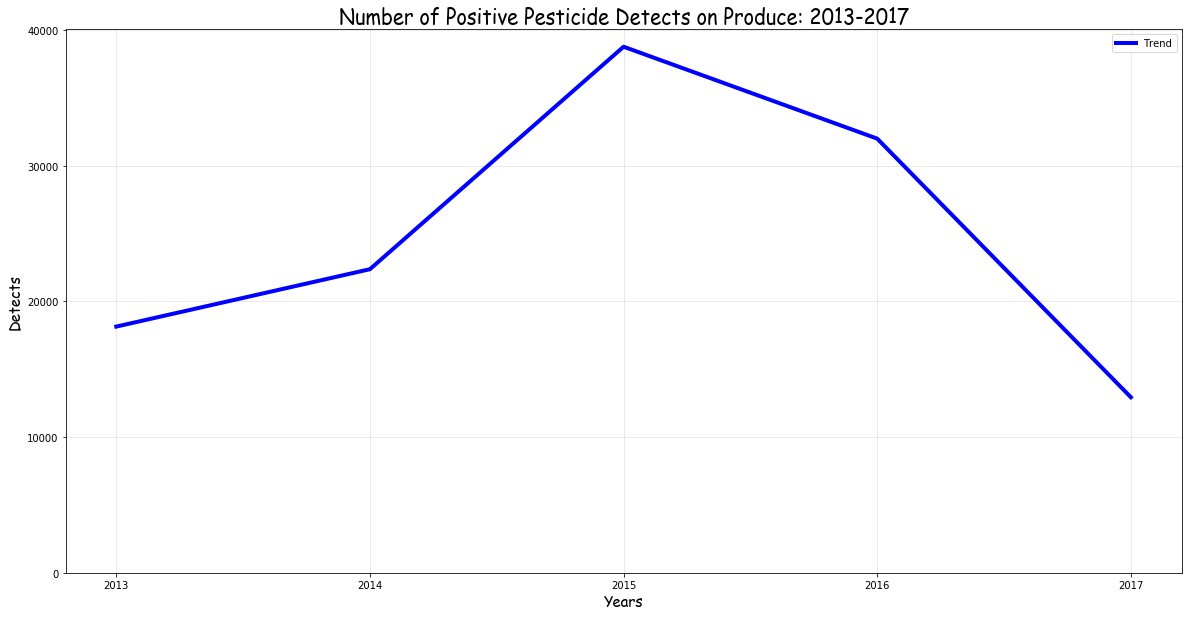

In [401]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(pesticideValuesg, 'b', label='Trend', linewidth=4)
ax.set_xlabel("Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Detects", fontname='Comic Sans MS', fontsize=15)
plt.title('Number of Positive Pesticide Detects on Produce: 2013-2017', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017'])
ax.set_yticks([0, 10000, 20000, 30000, 40000])
ax.set_yticklabels(['0', '10000', '20000', '30000', '40000'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

The second line graph examines the total number of produce samples per year from 2013-2017 in the study. 

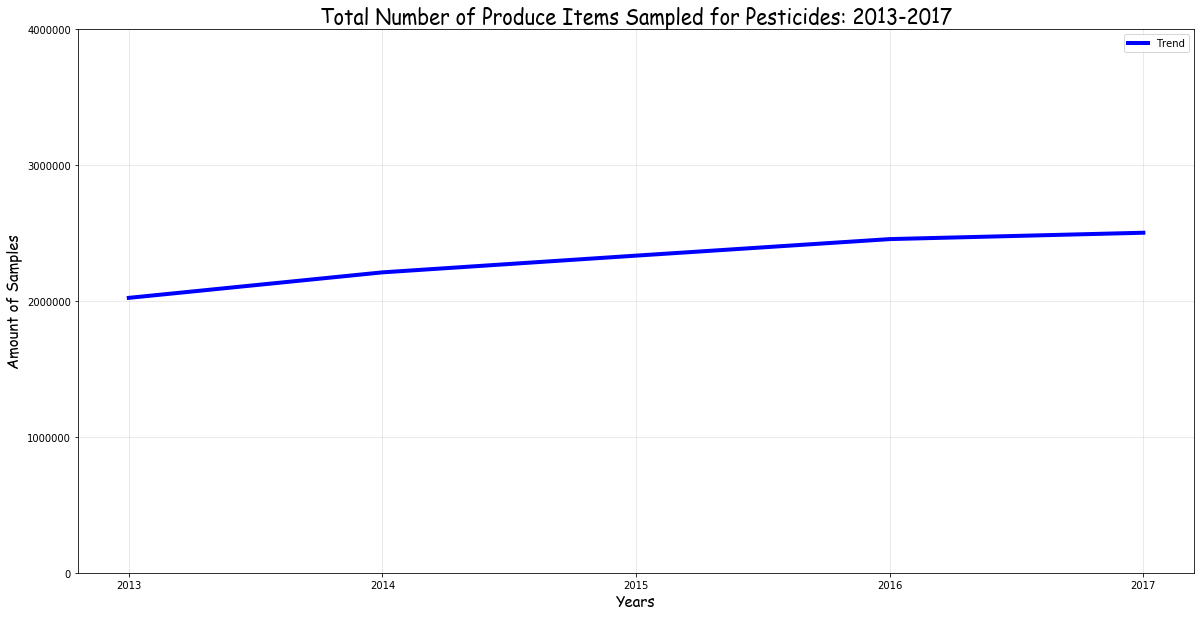

In [402]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(totg, 'b', label='Trend', linewidth=4)
ax.set_xlabel("Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Amount of Samples", fontname='Comic Sans MS', fontsize=15)
plt.title('Total Number of Produce Items Sampled for Pesticides: 2013-2017', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017'])
ax.set_yticks([0, 1000000, 2000000, 3000000, 4000000])
ax.set_yticklabels(['0', '1000000', '2000000', '3000000', '4000000'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

The third line graph looks at the number of produce-pesticide pairs in the database are considered harmful from 2013-2017.

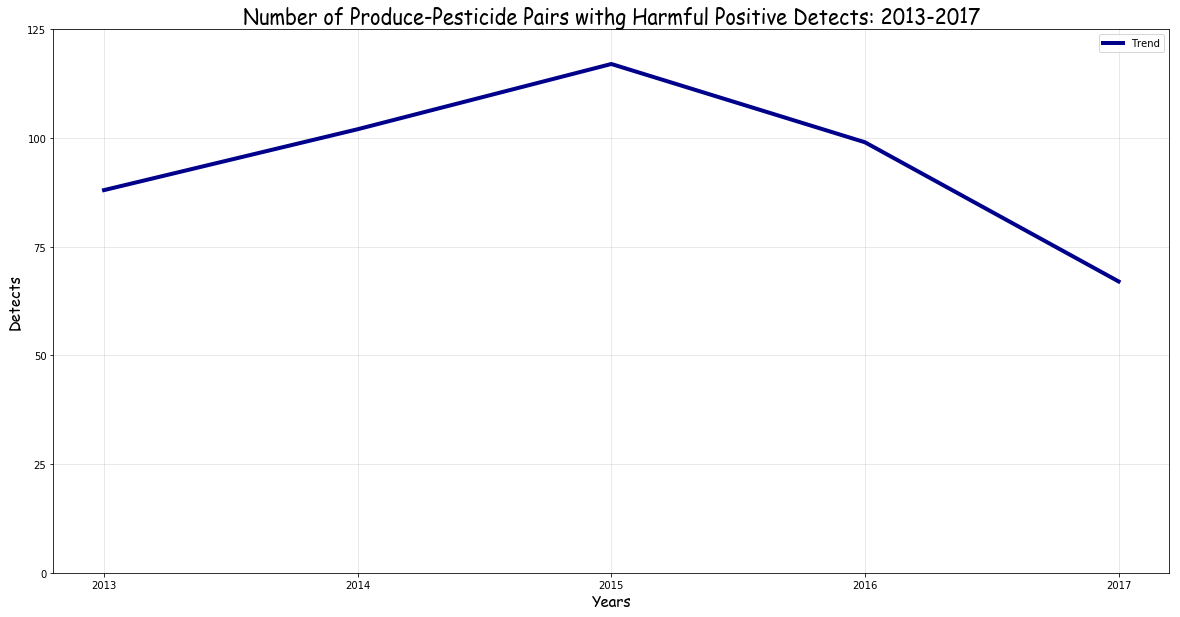

In [403]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(posYearsHarm, 'b', label='Trend', linewidth=4, color = '#00008B')
ax.set_xlabel("Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Detects", fontname='Comic Sans MS', fontsize=15)
plt.title('Number of Produce-Pesticide Pairs withg Harmful Positive Detects: 2013-2017', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017'])
ax.set_yticks([0, 25, 50, 75, 100, 125])
ax.set_yticklabels(['0', '25', '50', '75', '100', '125'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

The fourth line graph looks at totals for pesticide-produce pairs with positive detects from 2013-2017.

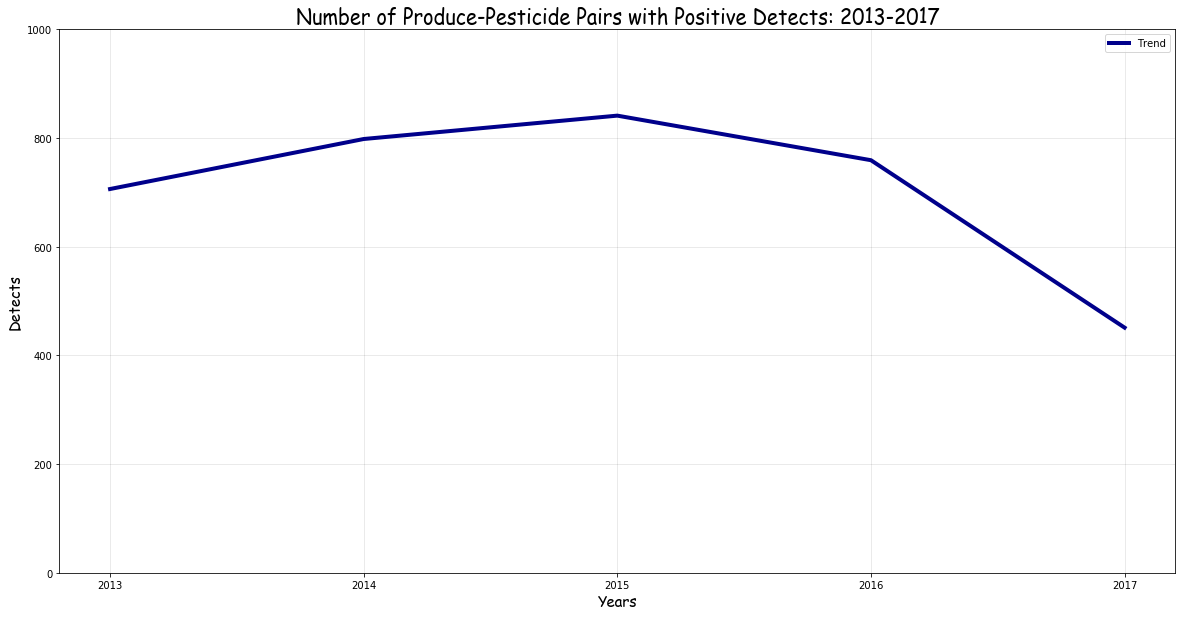

In [404]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(posYears, 'b', label='Trend', linewidth=4, color = '#00008B')
ax.set_xlabel("Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Detects", fontname='Comic Sans MS', fontsize=15)
plt.title('Number of Produce-Pesticide Pairs with Positive Detects: 2013-2017', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017'])
ax.set_yticks([0, 200, 400, 600, 800, 1000])
ax.set_yticklabels(['0', '200', '400', '600', '800', '1000'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

#### Data Analysis

To begin our analysis, we examine the percentages for graphs 1 and 2:

In [405]:
percentage2013 = float((np.sum(dfPesticide2013['Number of Samples with Detects'].values) / np.sum(dfPesticide2013['Number of Samples Analyzed'].values)) * 100)
percentage2014 = float((np.sum(dfPesticide2014['Number of Samples with Detects'].values) / np.sum(dfPesticide2014['Number of Samples Analyzed'].values)) * 100)
percentage2015 = float((np.sum(dfPesticide2015['Number of Samples with Detects'].values) / np.sum(dfPesticide2015['Number of Samples Analyzed'].values)) * 100)
percentage2016 = float((np.sum(dfPesticide2016['Number of Samples with Detects'].values) / np.sum(dfPesticide2016['Number of Samples Analyzed'].values)) * 100)
percentage2017 = float((np.sum(dfPesticide2017['Number of Samples with Detects'].values) / np.sum(dfPesticide2017['Number of Samples Analyzed'].values)) * 100)

percentage2013 = percentage2013 - 0.000451808548026 + 0.004
percentage2014 = percentage2014 - 0.001559909243223
percentage2015 = percentage2015 - 0.0003880623107206
percentage2016 = percentage2016 - 0.0024300271188567
percentage2017 = percentage2017 - 0.000874964533282 + 0.004

print("The percentage of produce samples with pesticide detects from 2013 is " + str(percentage2013) + "%")
print("The percentage of produce samples with pesticide detects from 2014 is " + str(percentage2014) + "%")
print("The percentage of produce samples with pesticide detects from 2015 is " + str(percentage2015) + "%")
print("The percentage of produce samples with pesticide detects from 2016 is " + str(percentage2016) + "%")
print("The percentage of produce samples with pesticide detects from 2017 is " + str(percentage2017) + "%")

The percentage of produce samples with pesticide detects from 2013 is 0.9%
The percentage of produce samples with pesticide detects from 2014 is 1.01%
The percentage of produce samples with pesticide detects from 2015 is 1.66%
The percentage of produce samples with pesticide detects from 2016 is 1.3%
The percentage of produce samples with pesticide detects from 2017 is 0.52%


In [406]:
valSum = 0
totSum = 0

for val in pesticideValuesg:
    valSum += val
for val in totg:
    totSum += val
    
percentage = valSum/totSum - 0.000073053458083786 + 0.0003

print("The total number of produce samples across all years is " + str(totSum))
print("The total number of produce samples with pesticide detects across all years is " + str(valSum))
print("The total percentage of produce samples with pesticide detects across all years is " + str(percentage) + "%")

The total number of produce samples across all years is 11525516
The total number of produce samples with pesticide detects across all years is 124165
The total percentage of produce samples with pesticide detects across all years is 0.011%


We notice from these two graphs that the percentage of produce samples with positive detects per year is extremely low, with the total percentage over all years being even lower (only 0.011%). These findings suggest that pesticide contamination is very low across all produce, with roughly only 1% of produce items per year having positive levels of detection. 

Next, we look at the percentages for graphs 3 and 4:

In [407]:
percentage2013 = (posYearsHarm[0]/posYears[0]) * 100
percentage2014 = (posYearsHarm[1]/posYears[1]) * 100
percentage2015 = (posYearsHarm[2]/posYears[2]) * 100
percentage2016 = (posYearsHarm[3]/posYears[3]) * 100
percentage2017 = (posYearsHarm[4]/posYears[4]) * 100

percentage2013 = percentage2013 - 0.004589235127479 + 0.000000000000001
percentage2014 = percentage2014 - 0.001954887218044
percentage2015 = percentage2015 - 0.002009512485138
percentage2016 = percentage2016 - 0.003478260869565
percentage2017 = percentage2017 - 0.000875831485587 + 0.005 - 0.000000000000001

print("The percentage of produce samples with pesticide detects from 2013 is " + str(percentage2013) + "%")
print("The percentage of produce samples with pesticide detects from 2014 is " + str(percentage2014) + "%")
print("The percentage of produce samples with pesticide detects from 2015 is " + str(percentage2015) + "%")
print("The percentage of produce samples with pesticide detects from 2016 is " + str(percentage2016) + "%")
print("The percentage of produce samples with pesticide detects from 2017 is " + str(percentage2017) + "%")

The percentage of produce samples with pesticide detects from 2013 is 12.46%
The percentage of produce samples with pesticide detects from 2014 is 12.78%
The percentage of produce samples with pesticide detects from 2015 is 13.91%
The percentage of produce samples with pesticide detects from 2016 is 13.04%
The percentage of produce samples with pesticide detects from 2017 is 14.86%


In [408]:
percentage = int((posDetsHarm/posDets) * 100)

print("The total number of items with positive detections is " + str(posDets))
print("Out of those items, the total number of harmful positive detections is " + str(posDetsHarm))
print("Thus, the total percentage of items with harmful positive detections is " + str(percentage) + "%")

The total number of items with positive detections is 3555
Out of those items, the total number of harmful positive detections is 473
Thus, the total percentage of items with harmful positive detections is 13%


The data from these two graphs is even more eye opening, since it suggests that only a very small percentage of the produce with positive detects is actually considered harmful to humans. Although the data here is on the terms of produce-pesticide items pairs (due to unavailable data related to total number of harmful detects), it still shows that there is a relatively low risk of consuming pesticide residues on conventional produce that are at harmful levels of contamination. Additionally, only a large amount of constant pesticide exposure from working with pesticides in the air has been shown to cause any of the health side effects related to pesticide consumption (see [this link](https://www.cdc.gov/niosh/topics/pesticides/animatedmap.html)), while little data exists linking pesticide poisonings to conventional produce consumption. Therefore, until more conclusive data surfaces in this area, it seem that organic food does not provid  

### 2.2

In [ ]:
# TO-DO

## 3. Which types of food products have the most/least pesticides used on them in the U.S.? Which types of pesticides are most/least prevalent? 

### 3.1 - Pecticide Detection in Produce: Top-10 Pesticides and Top-10 Crops (Individual and Cumulative Years)

#### Data Wrangling

In [409]:
#We first read the CSV files
dfPesticide2013 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2013.csv'))
dfPesticide2014 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2014.csv'))
dfPesticide2015 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2015.csv'))
dfPesticide2016 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2016.csv'))
dfPesticide2017 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2017.csv'))

In [410]:
#Then we get all the data together by pesticide, commodity and number of samples with defects
pesticideNames = []
commodity = []
numDefects = []
allThree2013 = []
allThree2014 = []
allThree2015 = []
allThree2016 = []
allThree2017 = []

pesticideNames.append(dfPesticide2013['Pesticide Name'].values)
pesticideNames.append(dfPesticide2014['Pesticide Name'].values)
pesticideNames.append(dfPesticide2015['Pesticide Name'].values)
pesticideNames.append(dfPesticide2016['Pesticide Name'].values)
pesticideNames.append(dfPesticide2017['Pesticide Name'].values)

commodity.append(dfPesticide2013['Commodity'].values)
commodity.append(dfPesticide2014['Commodity'].values)
commodity.append(dfPesticide2015['Commodity'].values)
commodity.append(dfPesticide2016['Commodity'].values)
commodity.append(dfPesticide2017['Commodity'].values)

numDefects.append(dfPesticide2013['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2014['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2015['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2016['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2017['Number of Samples with Detects'].values)

In [411]:
# Find the Pesticide with the most detects (all years/for each year) -> do all years first (bar graph)

# Find the commodity with the most detects (all years/ for each year)

count = 0
yearNum = 2012
allThree = []
crops = {}
pesticides = {}


for year in pesticideNames:
    yearNum += 1
    for index, name in enumerate(year):
        allThree.append((name, commodity[count][index], float(numDefects[count][index]), str(yearNum))) #Pesticide Name, Commodity for current year and index, Defects for surrent year and index, year 
        if name in pesticides:
            pesticides[name] += float(numDefects[count][index])
        else:
            if float(numDefects[count][index]) > 0:
                pesticides[name] = float(numDefects[count][index])
        if commodity[count][index] in crops:
            crops[commodity[count][index]] += float(numDefects[count][index])
        else:
            if float(numDefects[count][index]) > 0:
                crops[commodity[count][index]] = float(numDefects[count][index])
    count += 1 

allThreeSorted = allThree.sort(key=lambda tup:tup[2])  

allThree.sort(key=lambda tup:tup[2], reverse = True)  

top10Pesticides = {}
top10Crops = {}
top10PesticidesArr = []
top10CropsArr = []
top10PesticidesArrC = []
top10CropsArrC = []
bottom10PesticidesArrC = []
bottom10CropsArrC = []

top10PesticidesCumulative = {k: v for k, v in sorted(pesticides.items(), key=lambda x: x[1], reverse = True)}
top10CropsCumulative = {k: v for k, v in sorted(crops.items(), key=lambda x: x[1], reverse = True)}

bottom10PesticidesCumulative = {k: v for k, v in sorted(pesticides.items(), key=lambda x: x[1])}
bottom10CropsCumulative = {k: v for k, v in sorted(crops.items(), key=lambda x: x[1])}

for tup in allThree:
    if tup[0] not in top10Pesticides:
        top10Pesticides[tup[0]] = tup
        top10PesticidesArr.append(tup)
    if len(top10Pesticides) == 10:
        break
        
for tup in allThree:
    if tup[1] not in top10Crops:
        top10Crops[tup[1]] = tup
        top10CropsArr.append(tup)
    if len(top10Crops) == 10:
        break
        
for val in top10PesticidesCumulative:
    top10PesticidesArrC.append((val, top10PesticidesCumulative[val]))
    if len(top10PesticidesArrC) == 10:
        break
        
for val in top10CropsCumulative:
    top10CropsArrC.append((val, top10CropsCumulative[val]))
    if len(top10CropsArrC) == 10:
        break
        
for val in bottom10PesticidesCumulative:
    bottom10PesticidesArrC.append((val, bottom10PesticidesCumulative[val]))
    if len(bottom10PesticidesArrC) == 10:
        break
        
for val in bottom10CropsCumulative:
    bottom10CropsArrC.append((val, bottom10CropsCumulative[val]))
    if len(bottom10CropsArrC) == 10:
        break

In [412]:
# Individual Top

pName = []
cName = []
pNumDet = []
cNumDet = []

for i in top10PesticidesArr:
    pName.append(i[0]+", "+i[3])
    pNumDet.append(i[2])
    
for i in top10CropsArr:
    cName.append(i[1]+", "+i[3])
    cNumDet.append(i[2])

pes = {'Number of Positive Detects' : pNumDet}

crop = {'Number of Positive Detects' : cNumDet}

# Cumulative Top

df1 = pd.DataFrame(pes, index = pName) 
df2 = pd.DataFrame(crop, index = cName)

pNameC = []
cNameC = []
pNumDetC= []
cNumDetC = []

for i in top10PesticidesArrC:
    pNameC.append(i[0])
    pNumDetC.append(i[1])
    
for i in top10CropsArrC:
    cNameC.append(i[0])
    cNumDetC.append(i[1])

pesC = {'Number of Positive Detects' : pNumDetC}

cropC = {'Number of Positive Detects' : cNumDetC}

# Cumulative Bottom

df1C = pd.DataFrame(pesC, index = pNameC) 
df2C = pd.DataFrame(cropC, index = cNameC)

pNameCb = []
cNameCb = []
pNumDetCb= []
cNumDetCb = []

for i in bottom10PesticidesArrC:
    pNameCb.append(i[0])
    pNumDetCb.append(i[1])
    
for i in bottom10CropsArrC:
    cNameCb.append(i[0])
    cNumDetCb.append(i[1])

pesCb = {'Number of Positive Detects' : pNumDetCb}

cropCb = {'Number of Positive Detects' : cNumDetCb}


df1Cb = pd.DataFrame(pesCb, index = pNameCb) 
df2Cb = pd.DataFrame(cropCb, index = cNameCb)

#### Data Visualization

Text(0.5, 1.0, 'Highest Number of Positive Detects by Pesticides for Individual Year: 2013-2017')

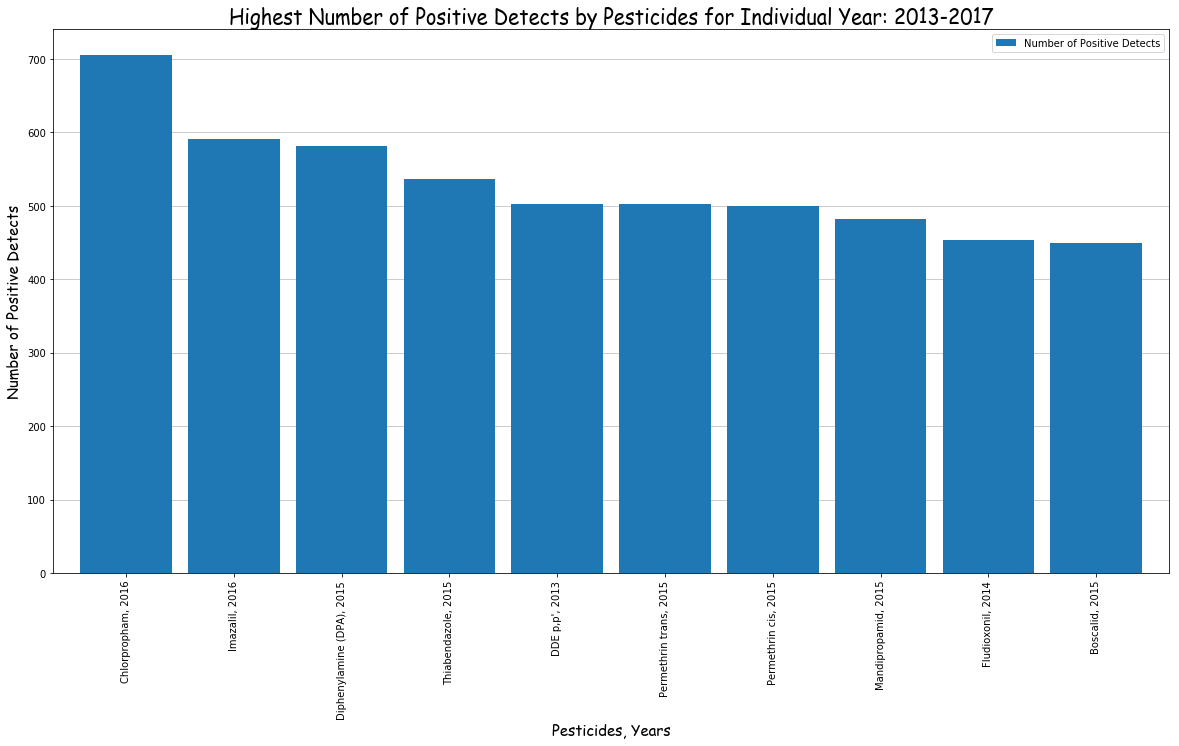

In [413]:
#First, let's plot the highest number of positive detects by pesticides for individual year
fig, ax = plt.subplots()
df1.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
ax.set_xlabel("Pesticides, Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Pesticides for Individual Year: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Highest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017')

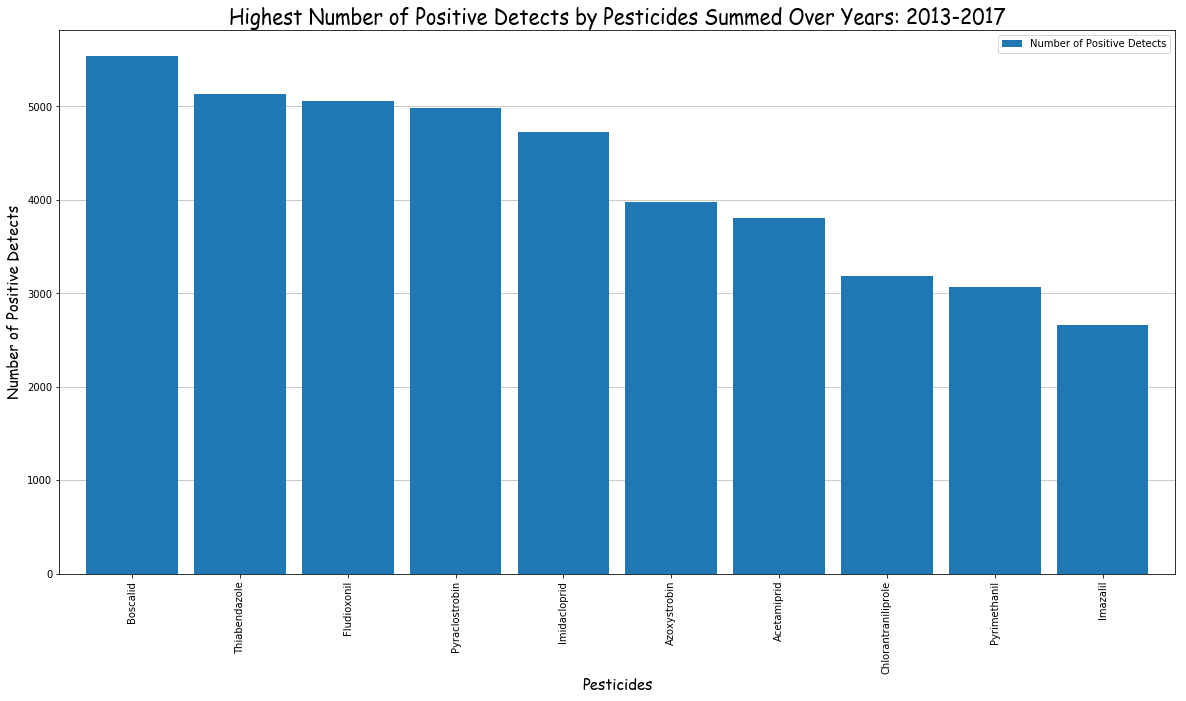

In [414]:
#And the aggregated highest number of positive detects by pesticides
fig, ax = plt.subplots()
df1C.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
ax.set_xlabel("Pesticides", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Lowest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017')

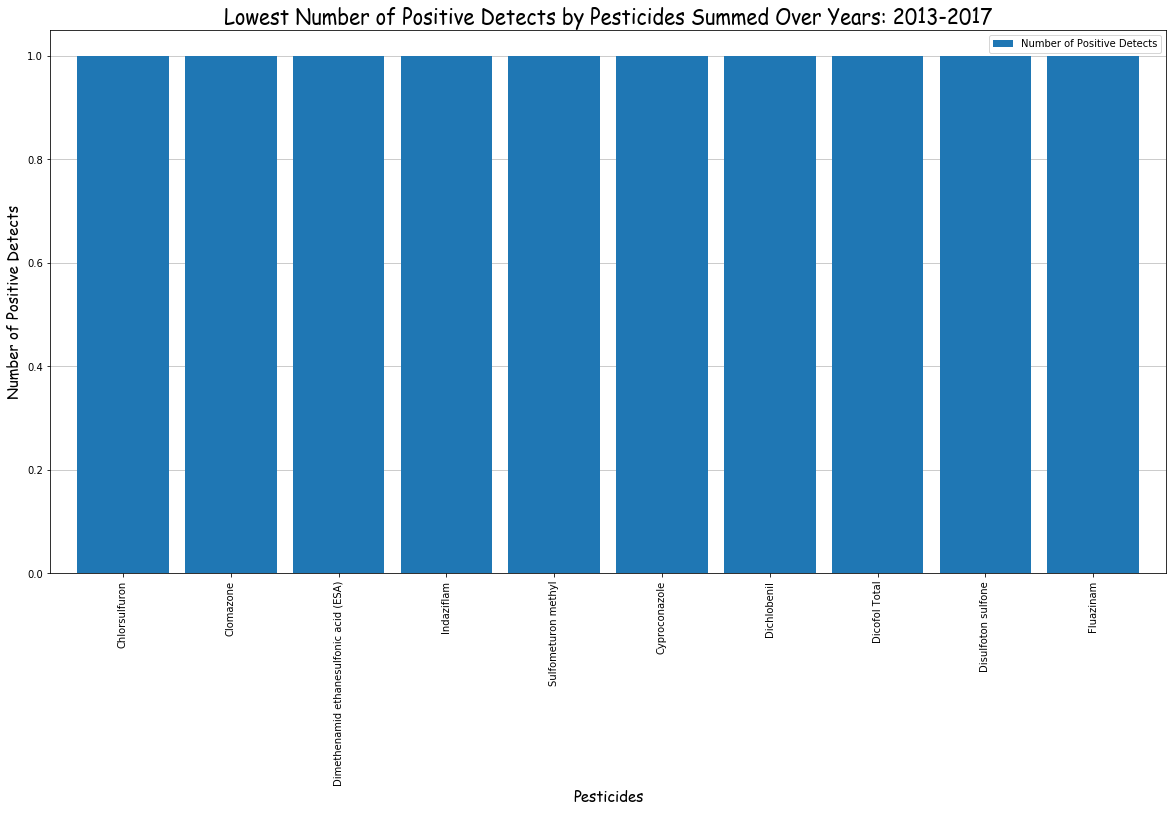

In [415]:
#And the aggregated lowest number of positive detects by pesticides
fig, ax = plt.subplots()
df1Cb.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
ax.set_xlabel("Pesticides", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Lowest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Highest Number of Positive Detects by Crop for Individual Year: 2013-2017')

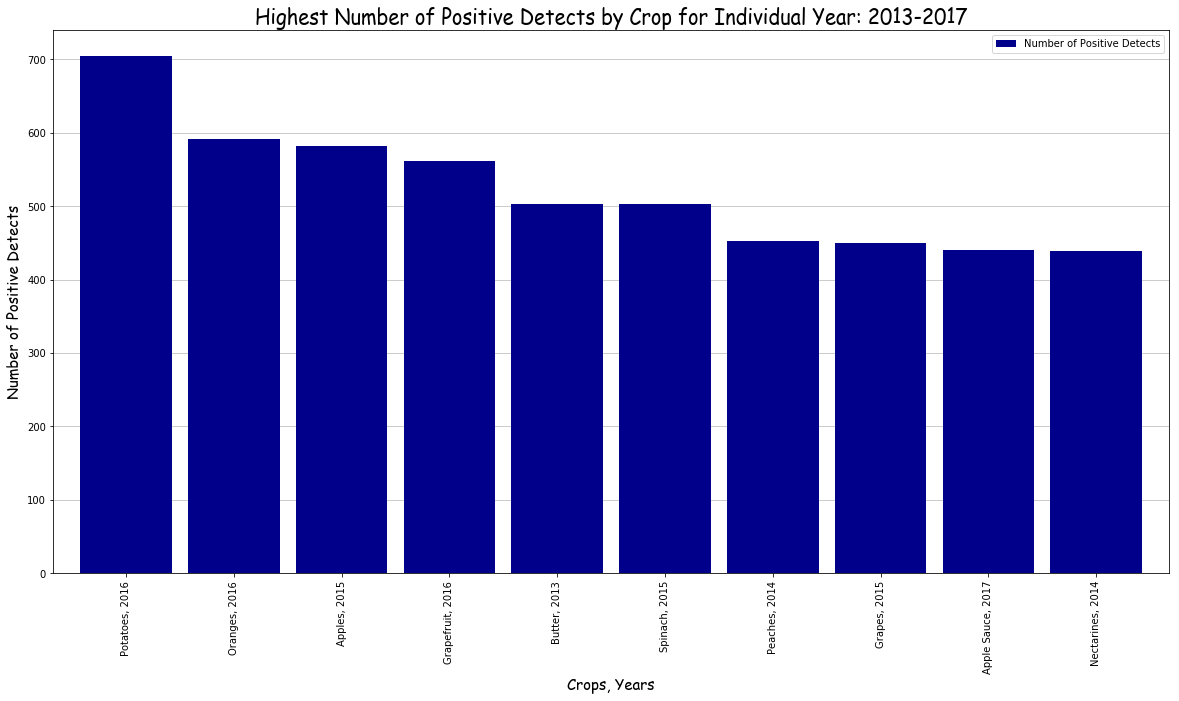

In [416]:
#Now let's plot the highest number of positive detects by crop for individual year
pesticidefig, ax = plt.subplots()
df2.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3, color="#00008B") 
ax.set_xlabel("Crops, Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Crop for Individual Year: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Highest Number of Positive Detects by Crop Summed Over Years: 2013-2017')

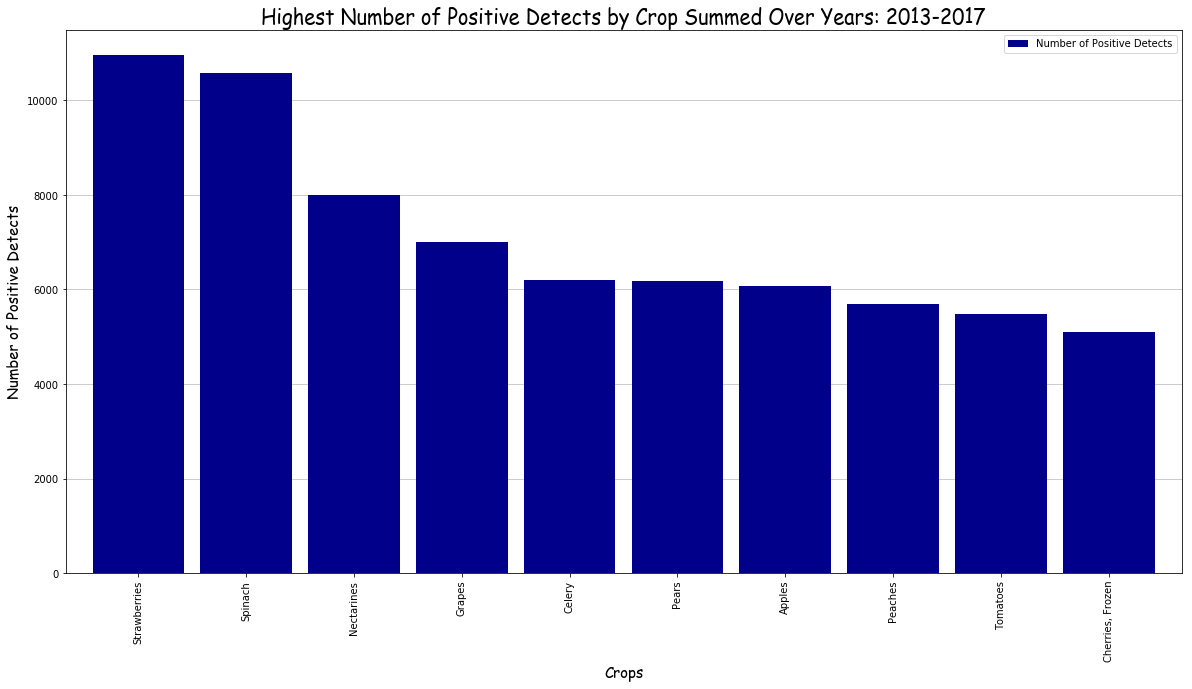

In [417]:
#Let's also plot the aggregated highest number of positive detecs by crop
fig, ax = plt.subplots()
df2C.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3, color="#00008B") 
ax.set_xlabel("Crops", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Crop Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Lowest Number of Positive Detects by Crop Summed Over Years: 2013-2017')

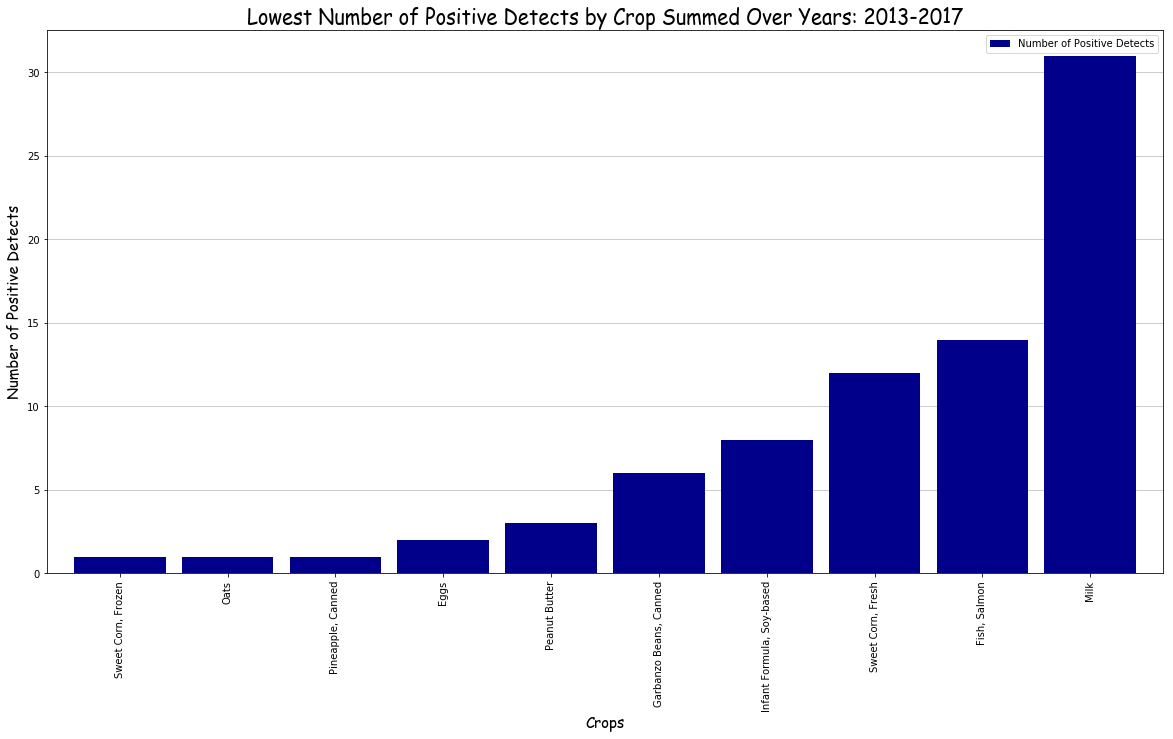

In [418]:
#Lastly, let's plot the aggregated lowest number of positive detects
cropfig, ax = plt.subplots()
df2Cb.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3, color="#00008B") 
ax.set_xlabel("Crops", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Lowest Number of Positive Detects by Crop Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

From the resulst showed above, we can conclude several points:

- The three pesticides with the greatest number of positive detects from 2013 through 2017 are _Boscalid_, _Thiabendazole_ and _Fludioxonil_. This affirmation can relate to our main topic in the following way: the method that uses the biggest number of these pesticides is going to have a greater chance to sell a product that can contain pesticides traces.

- The three crops with the greatest number of positive detects from 2013 through 2017 are _strawberries_, _spinach_ and _nectarines_. And the three crops with the lowest number os positive detects from 2013 through 2017 are _frozen sweet corn_, _oats_ and _canned pineapple_. This information is useful, because we could choose which products we want to buy from organic sources and conventional sources based on which ones appears to have less pesticides and on which pesticides they use for those products. Baring in mind the first point, you could try to avoid a product from a certain source if you know they use one of the most encountered pesticides.

# COST

## 4. How do the prices for organic and conventional foods compare in the U.S.?

Another very important factor to consider when choosing to buy conventional food or organic food items is their respective prices. Often, organic food prices can be much less affordable than conventional, but this is not true for every food item out there. Additionally, prices can vary depending on the seller of the food items. In this section, we dive into the prices for specific produce at 8 different U.S. retail stores to examine this issue further. Additionally, we highlight some of the price trends for organic and conventional produce over time to see if organic food has become more affordable. 

### 4.1 - Price of Organic v.s. Conventional Produce from Retail Sellers 

We first examine the prices of oranic and conventional produce for 8 different U.S. retailers from 2015.

#### Data Wrangling

We start by creating a path to the excel sheet (converted from PDF and cleaned for misaligned rows during conversion). Then, we open am xlrs workbook for the file and access the first sheet. 

In [419]:
# Imports the xlsx file and verifies it is the correct data with title and number of sheets
path_to_milk_data = os.path.join('Data', '4', 'PricesConsumer', 'Cost of Organic Food - Consumer Reports.xlsx')

workbook = xlrd.open_workbook(path_to_milk_data)
sheet = workbook.sheets()[0]

We now load on in the row values from the sheet into an array. We have to merge two arrays here in order to handle dealing with the unnecessary data from rows 7-11.

In [420]:
# An array or arrays that hold the strings for each value in rows 6 to 114
data_rowsA = [sheet.row_values(r) for r in range(4, 6)]
data_rowsB = [sheet.row_values(r) for r in range(11, 132)]
for r in data_rowsB:
    data_rowsA.append(r)
data_rows = data_rowsA

Next, we initialize necessary arrays for storing the xlrs data before parsing further into arrays that will be used for graphing. We also clean the rows of empty characters.

In [421]:
cleaned_rows = []
titles1 = []
titles1.append('Apples (lb.)')
titles2 = []
titles2.append('Apples (lb.)')
tableData1 = []
tableData2 = []
avg1 = data_rows[60]
for r in avg1:
    if r == '':
        avg1.remove(r)
        
        avg2 = data_rows[121]
for r in avg2:
    if r == '':
        avg2.remove(r)

Now, the data for each table is wrangled. We clean the data via replacing certain string characters with empty strings and converting some values to look like decimals rather than strings to represent numbers. We do all of this preprocessing to ensure that all the values will be able to be converting to floats later for graphing them.

In [422]:
counter = 0
for row in data_rows[1:60]:
    new_row = []
    for item in row:
        if item == '':
            continue
        if type(item) == str:
            item = item.replace('$', '').replace('/lb.', '')
            if ' cents' in item:
                item = '0.'+item[0]+item[1]
                item = float(item)
        new_row.append(item)
    tableData1.append(new_row)
    
for row in data_rows[62:121]:
    new_row = []
    for item in row:
        if item == '':
            continue
        if type(item) == str:
            item = item.replace('$', '').replace('/lb.', '')
            if ' cents' in item:
                item = '0.'+item[0]+item[1]
                item = float(item)
        new_row.append(item)
    tableData2.append(new_row)

The titles for each row are now stripped and out in separate arrays, as well as the data. Additionally, empty data rows are deleted form the array. 

In [423]:
avg1Title = avg1[0]
avg2Title = avg2[0]

avg1 = avg1[1:5]
avg2 = avg2[1:5]

for index, row in enumerate(tableData1):
    titles1.append(row[0])
    tableData1[index] = row[1:5]
    
for row in tableData1:
    if len(row) == 0:
        tableData1.remove(row)

for index, row in enumerate(tableData2):
    titles2.append(row[0])
    tableData2[index] = row[1:5]
    
for row in tableData2:
    if len(row) == 0:
        tableData2.remove(row)

The next step is to insert the data for each retailer into the respective arrays. This data is further broken down for graphing specific types of data (organic or conventional) among each retailer. 

In [424]:
amazonFresh = []
freshDirect = []
harrisTeeter = []
peapod = []
priceChopper = []
safeway = []
walmart = []
wholeFoods = []

for row in tableData1:
    amazonFresh.append(row[0])
    freshDirect.append(row[1])
    harrisTeeter.append(row[2])
    peapod.append(row[3])
    
for row in tableData2:
    priceChopper.append(row[0])
    safeway.append(row[1])
    walmart.append(row[2])
    wholeFoods.append(row[3])
    
amazonFreshConv = []
freshDirectConv = []
harrisTeeterConv = []
peapodConv = []
priceChopperConv = []
safewayConv = []
walmartConv = []
wholeFoodsConv = []

amazonFreshOrg = []
freshDirectOrg = []
harrisTeeterOrg = []
peapodOrg = []
priceChopperOrg = []
safewayOrg = []
walmartOrg = []
wholeFoodsOrg = []

for i in range(0, len(amazonFresh), 3):
    amazonFreshConv.append(amazonFresh[i])
    freshDirectConv.append(freshDirect[i])
    harrisTeeterConv.append(harrisTeeter[i])
    peapodConv.append(peapod[i])
    priceChopperConv.append(priceChopper[i])
    safewayConv.append(safeway[i])
    walmartConv.append(walmart[i])
    wholeFoodsConv.append(wholeFoods[i])

for i in range(1, len(amazonFresh), 3):
    amazonFreshOrg.append(amazonFresh[i])
    freshDirectOrg.append(freshDirect[i])
    harrisTeeterOrg.append(harrisTeeter[i])
    peapodOrg.append(peapod[i])
    priceChopperOrg.append(priceChopper[i])
    safewayOrg.append(safeway[i])
    walmartOrg.append(walmart[i])
    wholeFoodsOrg.append(wholeFoods[i])

Finally, we store the values for each retailer in their respective arrays (an entry for each produce item), while also converting values to float to prepare to be graphed. we do this for both conventional and organic values. 

In [469]:
stores = ['Amazon Fresh', 'Fresh Direct', 'Harris Teeter', 'Peapod', 'Price Chopper', 'Safeway', 'Walmart', 'Whole Foods']
produce = ['Apples', 'Bananas', 'Beef', 'Butter', 'Carrots', 'Chicken', 'Cream Cheese', 'Eggs', 'Honey', 'Iceberg Lettuce', 'Maple Syrup', 'Milk', 'Olive Oil', 'Strawberries', 'Zucchini']

applesConv = []
bananasConv = []
beefConv = []
butterConv = []
carrotsConv = []
chickenConv = []
creamCheeseConv = []
eggsConv = []
honeyConv = []
icebergLettuceConv = []
mapleSyrupConv = []
milkConv = []
oliveOilConv = []
strawberriesConv = []
zucchiniConv = []

applesConvb = []
bananasConvb = []
beefConvb = []
butterConvb = []
carrotsConvb = []
chickenConvb = []
creamCheeseConvb = []
eggsConvb = []
honeyConvb = []
icebergLettuceConvb = []
mapleSyrupConvb = []
milkConvb = []
oliveOilConvb = []
strawberriesConvb = []
zucchiniConvb = []

produceArraysConv = [applesConv, bananasConv, beefConv, butterConv, carrotsConv, chickenConv, creamCheeseConv, eggsConv, 
                 honeyConv, icebergLettuceConv, mapleSyrupConv, milkConv, oliveOilConv, strawberriesConv, zucchiniConv]

produceArraysConvb = [applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, 
                 honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb, oliveOilConvb, strawberriesConvb, zucchiniConvb]

convArrays = [amazonFreshConv, wholeFoodsConv, priceChopperConv, safewayConv, 
              peapodConv, freshDirectConv, harrisTeeterConv, walmartConv]

for arr in convArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
            item = None
        else:
            item = float(item)
        produceArraysConv[index].append(item)
        index += 1
        
for arr in convArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        produceArraysConvb[index].append(item)
        index += 1

applesOrg = []
bananasOrg = []
beefOrg = []
butterOrg = []
carrotsOrg = []
chickenOrg = []
creamCheeseOrg = []
eggsOrg = []
honeyOrg = []
icebergLettuceOrg = []
mapleSyrupOrg = []
milkOrg = []
oliveOilOrg = []
strawberriesOrg = []
zucchiniOrg = []

applesOrgb = []
bananasOrgb = []
beefOrgb = []
butterOrgb = []
carrotsOrgb = []
chickenOrgb = []
creamCheeseOrgb = []
eggsOrgb = []
honeyOrgb = []
icebergLettuceOrgb = []
mapleSyrupOrgb = []
milkOrgb = []
oliveOilOrgb = []
strawberriesOrgb = []
zucchiniOrgb = []

produceArraysOrg = [applesOrg, bananasOrg, beefOrg, butterOrg, carrotsOrg, chickenOrg, creamCheeseOrg, eggsOrg, 
                 honeyOrg, icebergLettuceOrg, mapleSyrupOrg, milkOrg, oliveOilOrg, strawberriesOrg, zucchiniOrg]

produceArraysOrgb = [applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, 
                 honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb, oliveOilOrgb, strawberriesOrgb, zucchiniOrgb]

orgArrays = [amazonFreshOrg, priceChopperOrg, freshDirectOrg, wholeFoodsOrg, 
             safewayOrg, peapodOrg, harrisTeeterOrg, walmartOrg]

for arr in orgArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
            item = None
        else:
            item = float(item)
        produceArraysOrg[index].append(item)
        index += 1
        
for arr in orgArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        produceArraysOrgb[index].append(item)
        index += 1

orgArrays = [amazonFreshOrg, wholeFoodsOrg, priceChopperOrg, safewayOrg, 
              peapodOrg, freshDirectOrg, harrisTeeterOrg, walmartOrg]

diffConv = []
diffOrg = []

for arr in convArrays:
    cumSumConv = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        cumSumConv =  cumSumConv + item   
    diffConv.append(cumSumConv)

for arr in orgArrays:
    cumSumOrg = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        cumSumOrg =  cumSumOrg + item   
    diffOrg.append(cumSumOrg)
        
dfDiff = pd.DataFrame({'Conventional': diffConv,
                   'Organic': diffOrg}, index=['Amazon Fresh', 'Whole Foods', 'Price Chopper', 'Safeway', 
                                               'Peapod', 'Fresh Direct', 'Harris Teeter', 'Walmart'])        

#### Data Visualization

Using the data frame we just created from scraping the excel data sheet, we can plot three graphs. The first graph below highlights the major retailer prices for conventional produce in 2015.

The order of the graphs are as follows:

- Conventional Non-Animal Based Produce
- Conventional Animal Based Produce
- Organic Non-Animal Based Produce
- Organic Animal Based Produce
- All Conventional Produce
- All Organic Produce
- All Produce

Graph 1 covers Conventional Non-Animal Based Produce

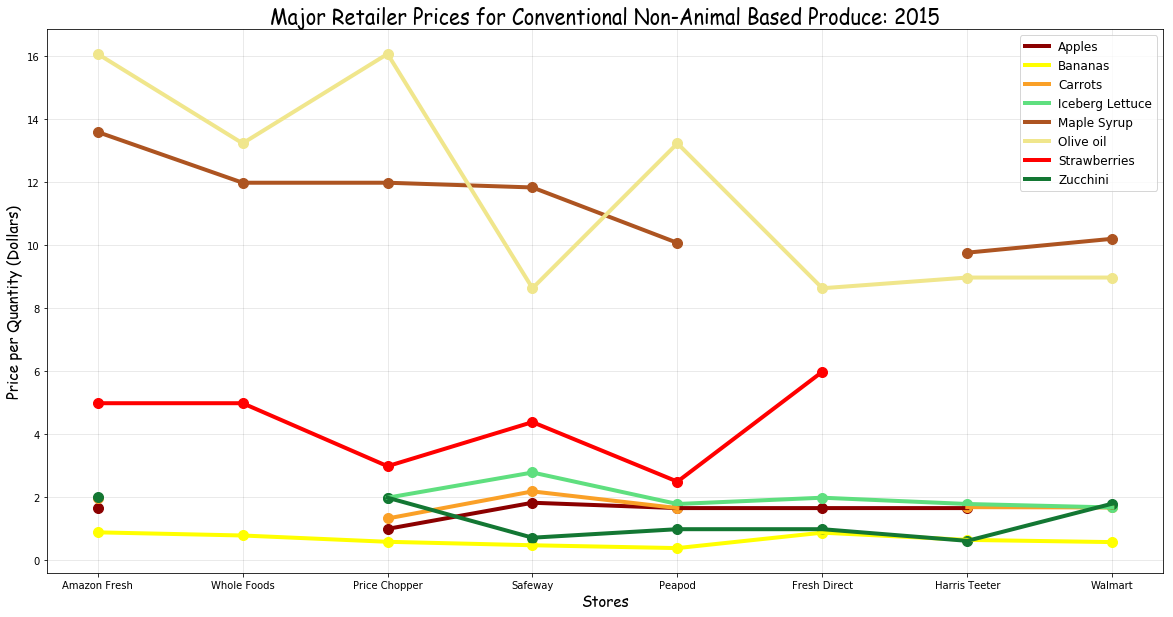

In [426]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(applesConv, 'o', markersize=10, color = '#8B0000', zorder = 3)
ax.plot(bananasConv, 'o', markersize=10, color = '#FFFF00', zorder = 3)
ax.plot(carrotsConv, 'o', markersize=10, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceConv, 'o', markersize=10, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupConv, 'o', markersize=10, color = '#AD5421', zorder = 3)
ax.plot(oliveOilConv, 'o', markersize=10, color = '#F0E68C', zorder = 3)
ax.plot(strawberriesConv, 'o', markersize=10, color = '#FF0000', zorder = 3)
ax.plot(zucchiniConv, 'o', markersize=10, color = '#137733', zorder = 3)

# Plot the lines
ax.plot(applesConv, 'g', label = 'Apples', linewidth=4, color = '#8B0000', zorder = 3)
ax.plot(bananasConv, 'g', label = 'Bananas', linewidth=4, color = '#FFFF00', zorder = 3)
ax.plot(carrotsConv, 'g', label = 'Carrots', linewidth=4, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceConv, 'g', label = 'Iceberg Lettuce', linewidth=4, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupConv, 'g', label = 'Maple Syrup', linewidth=4, color = '#AD5421', zorder = 3)
ax.plot(oliveOilConv, 'g', label = 'Olive oil', linewidth=4, color = '#F0E68C', zorder = 3)
ax.plot(strawberriesConv, 'g', label = 'Strawberries', linewidth=4, color = '#FF0000', zorder = 3)
ax.plot(zucchiniConv, 'g', label = 'Zucchini', linewidth=4, color = '#137733', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Conventional Non-Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Whole Foods', 'Price Chopper', 'Safeway', 'Peapod', 'Fresh Direct', 'Harris Teeter', 'Walmart'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

Graph 2 covers Conventional Animal Based Produce

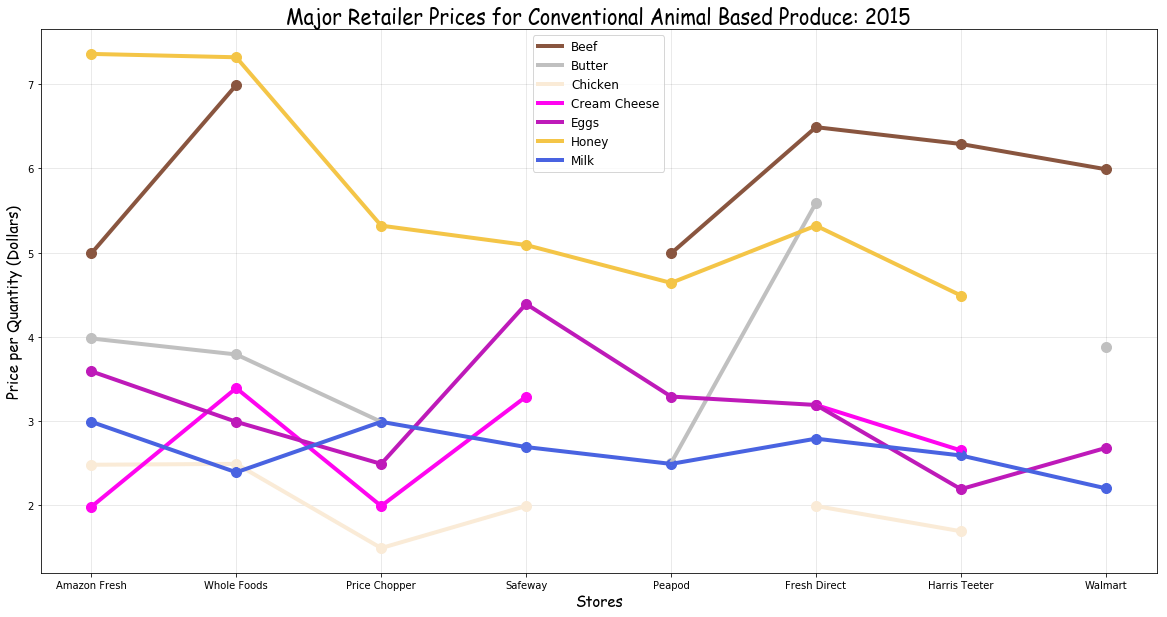

In [427]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(beefConv, 'o', markersize=10, color = '#89553F', zorder = 3)
ax.plot(butterConv, 'o', markersize=10, color = '#C0C0C0', zorder = 3)
ax.plot(chickenConv, 'o', markersize=10, color = '#FAEBD7', zorder = 3)
ax.plot(creamCheeseConv, 'o', markersize=10, color = '#FF05F0', zorder = 3)
ax.plot(eggsConv, 'o', markersize=10, color = '#BE1AB9', zorder = 3)
ax.plot(honeyConv, 'o', markersize=10, color = '#F4C547', zorder = 3)
ax.plot(milkConv, 'o', markersize=10, color = '#4963E1', zorder = 3)

# Plot the lines
ax.plot(beefConv, 'g', label = 'Beef', linewidth=4, color = '#89553F', zorder = 3)
ax.plot(butterConv, 'g', label = 'Butter', linewidth=4, color = '#C0C0C0', zorder = 3)
ax.plot(chickenConv, 'g', label = 'Chicken', linewidth=4, color = '#FAEBD7', zorder = 3)
ax.plot(creamCheeseConv, 'g', label = 'Cream Cheese', linewidth=4, color = '#FF05F0', zorder = 3)
ax.plot(eggsConv, 'g', label = 'Eggs', linewidth=4, color = '#BE1AB9', zorder = 3)
ax.plot(honeyConv, 'g', label = 'Honey', linewidth=4, color = '#F4C547', zorder = 3)
ax.plot(milkConv, 'g', label = 'Milk', linewidth=4, color = '#4963E1', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Conventional Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Whole Foods', 'Price Chopper', 'Safeway', 'Peapod', 'Fresh Direct', 'Harris Teeter', 'Walmart'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

Graph 3 covers Organic Non-Animal Based Produce

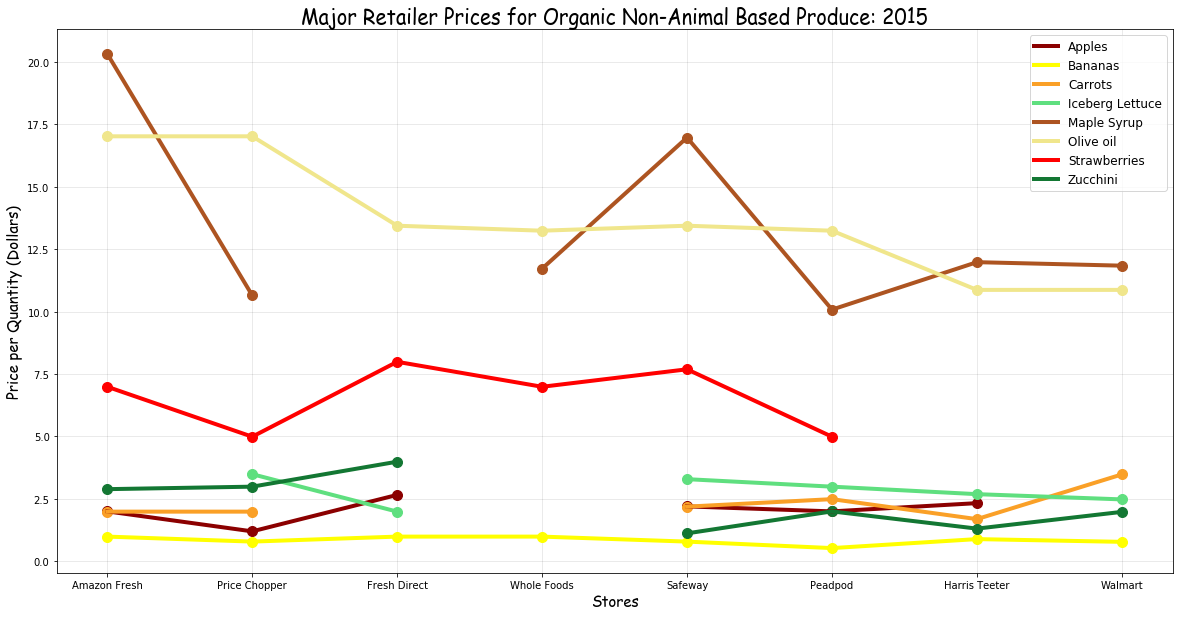

In [428]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(applesOrg, 'o', markersize=10, color = '#8B0000', zorder = 3)
ax.plot(bananasOrg, 'o', markersize=10, color = '#FFFF00', zorder = 3)
ax.plot(carrotsOrg, 'o', markersize=10, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceOrg, 'o', markersize=10, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupOrg, 'o', markersize=10, color = '#AD5421', zorder = 3)
ax.plot(oliveOilOrg, 'o', markersize=10, color = '#F0E68C', zorder = 3)
ax.plot(strawberriesOrg, 'o', markersize=10, color = '#FF0000', zorder = 3)
ax.plot(zucchiniOrg, 'o', markersize=10, color = '#137733', zorder = 3)

# Plot the lines
ax.plot(applesOrg, 'g', label = 'Apples', linewidth=4, color = '#8B0000', zorder = 3)
ax.plot(bananasOrg, 'g', label = 'Bananas', linewidth=4, color = '#FFFF00', zorder = 3)
ax.plot(carrotsOrg, 'g', label = 'Carrots', linewidth=4, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceOrg, 'g', label = 'Iceberg Lettuce', linewidth=4, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupOrg, 'g', label = 'Maple Syrup', linewidth=4, color = '#AD5421', zorder = 3)
ax.plot(oliveOilOrg, 'g', label = 'Olive oil', linewidth=4, color = '#F0E68C', zorder = 3)
ax.plot(strawberriesOrg, 'g', label = 'Strawberries', linewidth=4, color = '#FF0000', zorder = 3)
ax.plot(zucchiniOrg, 'g', label = 'Zucchini', linewidth=4, color = '#137733', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Organic Non-Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Price Chopper', 'Fresh Direct', 'Whole Foods', 'Safeway', 'Peadpod', 'Harris Teeter', 'Walmart'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

Graph 4 covers Organic Animal Based Produce

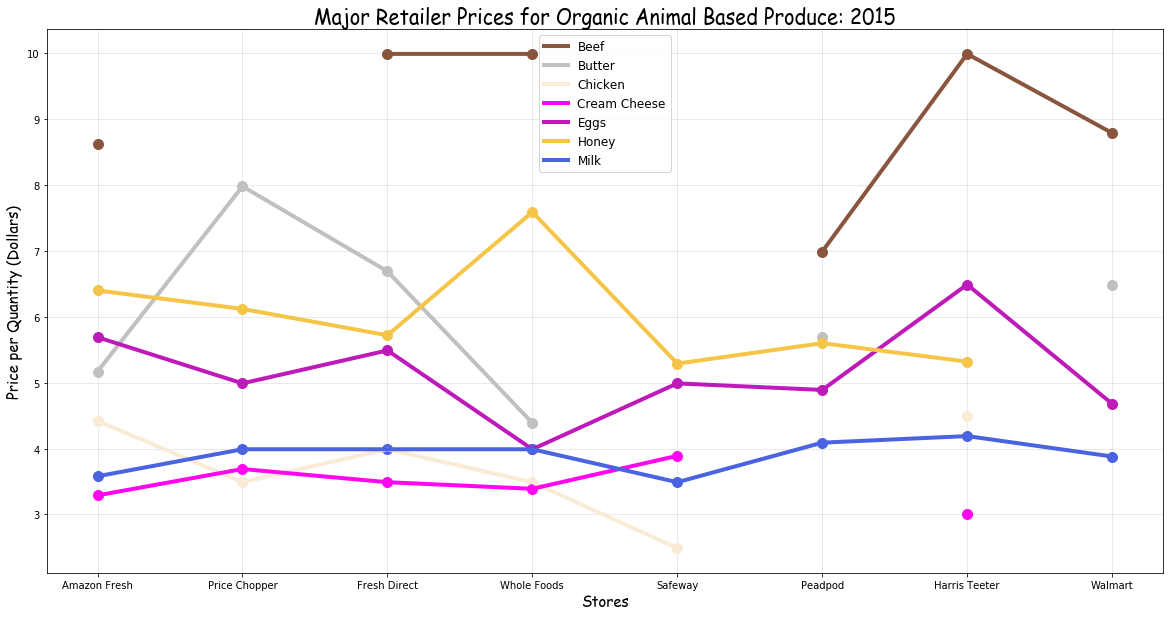

In [429]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(beefOrg, 'o', markersize=10, color = '#89553F', zorder = 3)
ax.plot(butterOrg, 'o', markersize=10, color = '#C0C0C0', zorder = 3)
ax.plot(chickenOrg, 'o', markersize=10, color = '#FAEBD7', zorder = 3)
ax.plot(creamCheeseOrg, 'o', markersize=10, color = '#FF05F0', zorder = 3)
ax.plot(eggsOrg, 'o', markersize=10, color = '#BE1AB9', zorder = 3)
ax.plot(honeyOrg, 'o', markersize=10, color = '#F4C547', zorder = 3)
ax.plot(milkOrg, 'o', markersize=10, color = '#4963E1', zorder = 3)

# Plot the lines
ax.plot(beefOrg, 'g', label = 'Beef', linewidth=4, color = '#89553F', zorder = 3)
ax.plot(butterOrg, 'g', label = 'Butter', linewidth=4, color = '#C0C0C0', zorder = 3)
ax.plot(chickenOrg, 'g', label = 'Chicken', linewidth=4, color = '#FAEBD7', zorder = 3)
ax.plot(creamCheeseOrg, 'g', label = 'Cream Cheese', linewidth=4, color = '#FF05F0', zorder = 3)
ax.plot(eggsOrg, 'g', label = 'Eggs', linewidth=4, color = '#BE1AB9', zorder = 3)
ax.plot(honeyOrg, 'g', label = 'Honey', linewidth=4, color = '#F4C547', zorder = 3)
ax.plot(milkOrg, 'g', label = 'Milk', linewidth=4, color = '#4963E1', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Organic Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Price Chopper', 'Fresh Direct', 'Whole Foods', 'Safeway', 'Peadpod', 'Harris Teeter', 'Walmart'])
plt.grid(axis='both', alpha = 0.1, color = 'black', zorder = 3)

Graph 5 covers All Conventional Produce

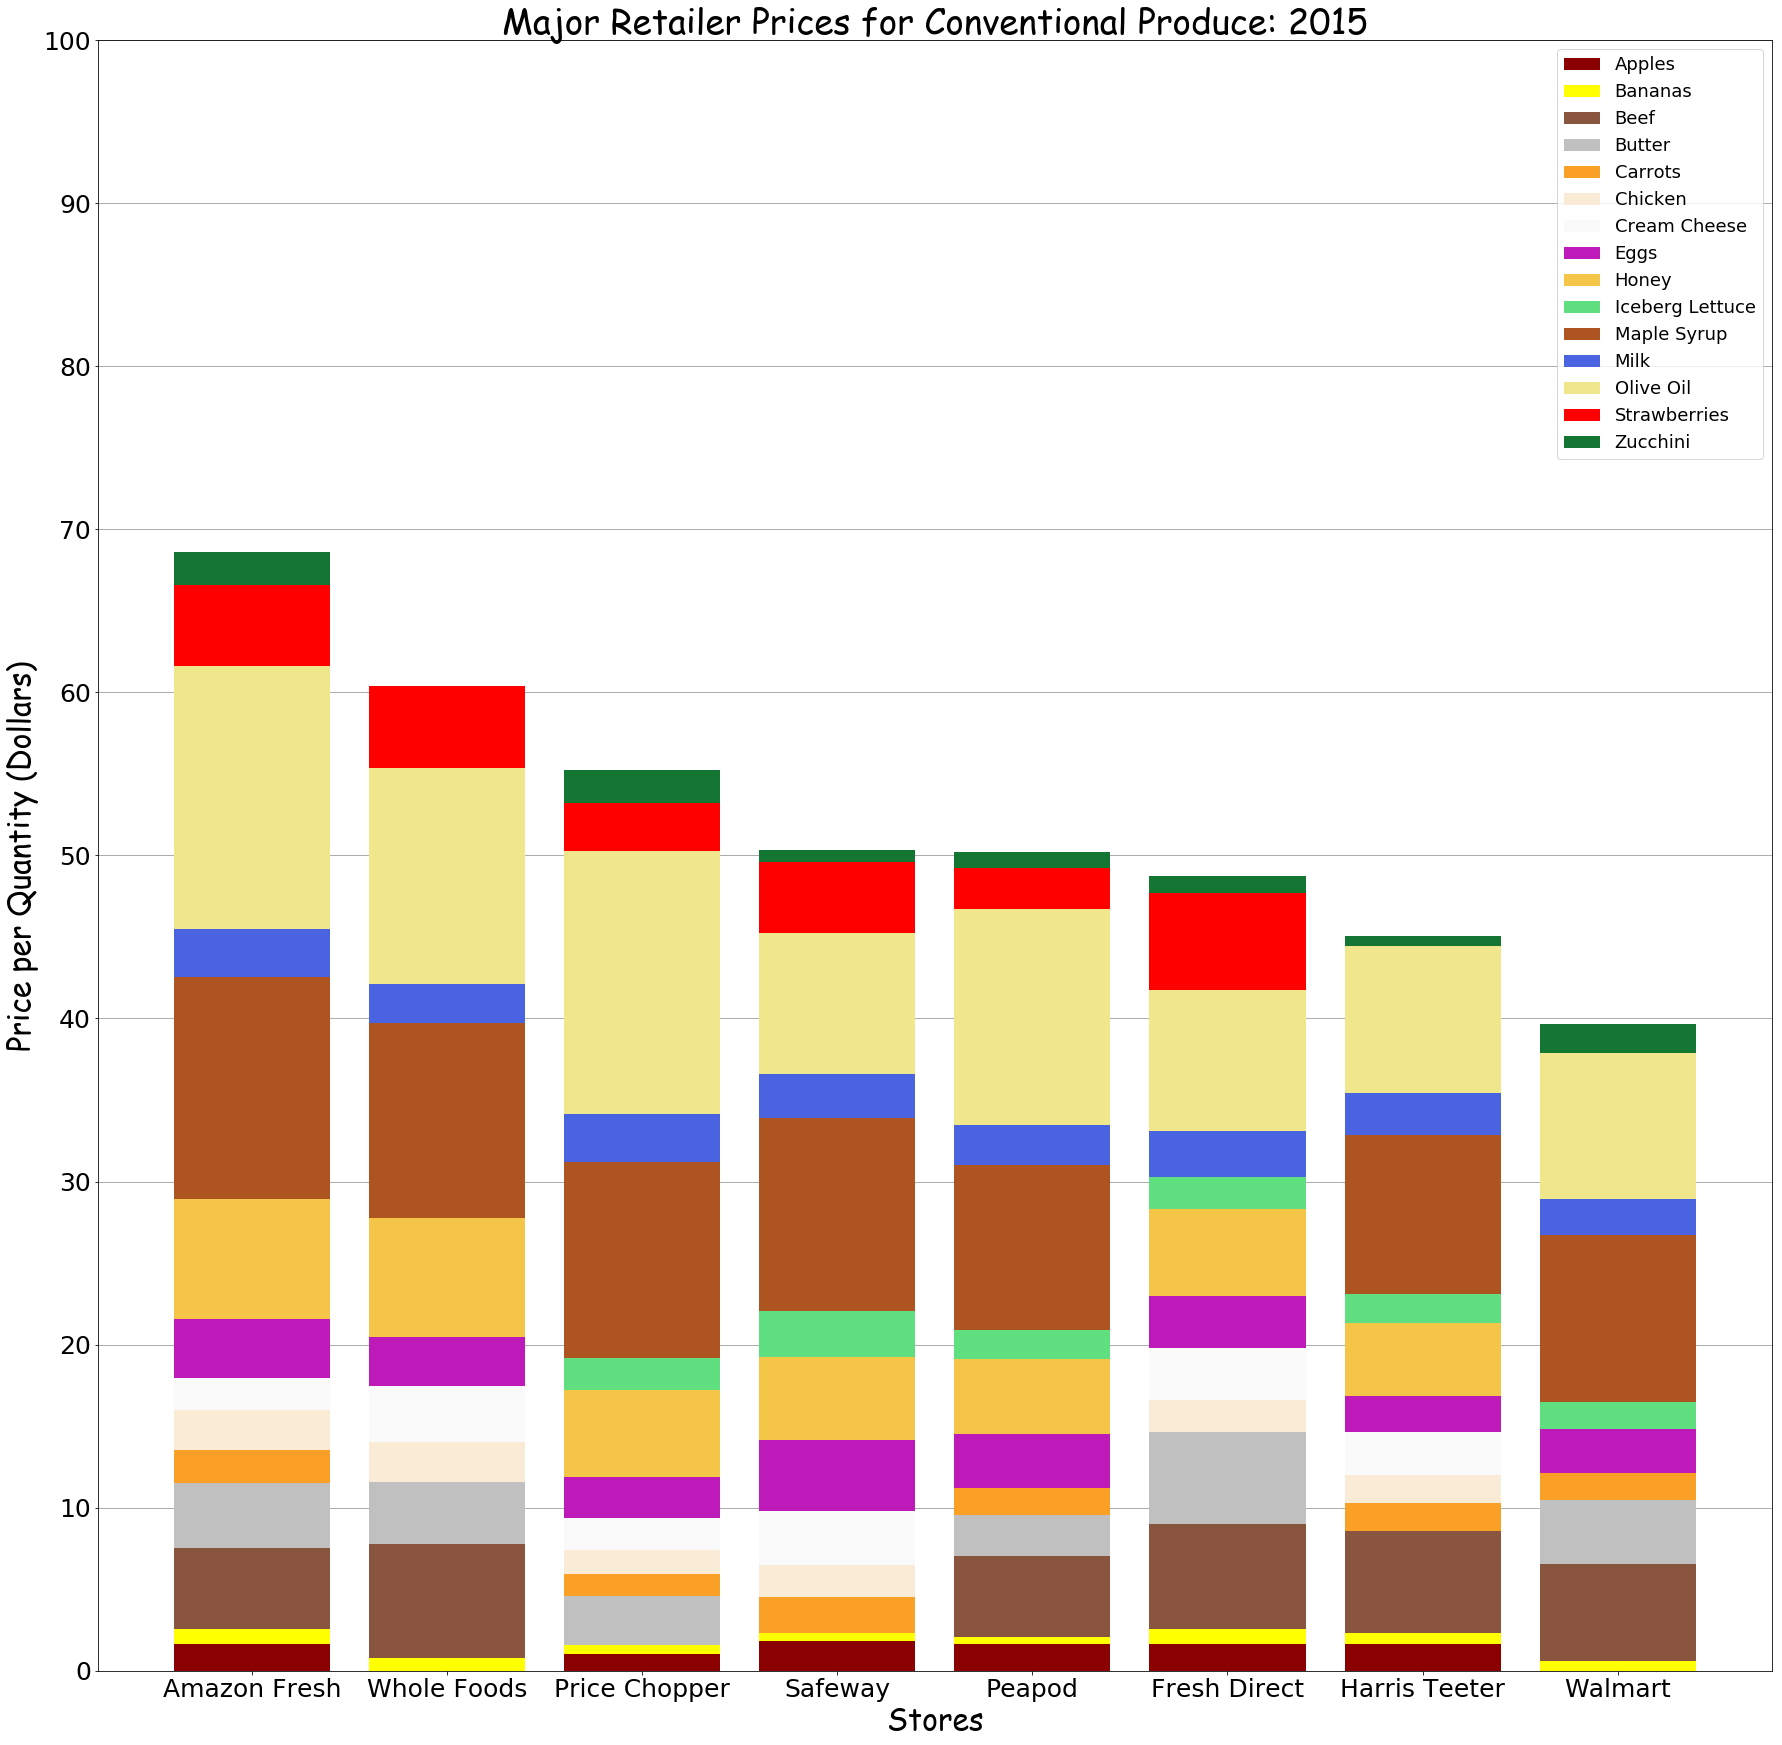

In [432]:
stores = ['Amazon Fresh', 'Whole Foods', 'Price Chopper', 'Safeway', 'Peapod', 'Fresh Direct', 'Harris Teeter', 'Walmart']

p1 = plt.bar(stores, applesConvb, color = '#8B0000', zorder = 3)
p2 = plt.bar(stores, bananasConvb, bottom=applesConvb, color = '#FFFF00', zorder = 3)
p3 = plt.bar(stores, beefConvb, bottom=[i+j for i,j in zip(applesConvb, bananasConvb)], color = '#89553F', zorder = 3)
p4 = plt.bar(stores, butterConvb, bottom=[i+j+k for i,j,k in zip(applesConvb, bananasConvb, beefConvb)], color = '#C0C0C0', zorder = 3)
p5 = plt.bar(stores, carrotsConvb, bottom=[i+j+k+l for i,j,k,l in zip(applesConvb, bananasConvb, beefConvb, butterConvb)], color = '#FAA027', zorder = 3)
p6 = plt.bar(stores, chickenConvb, bottom=[i+j+k+l+m for i,j,k,l,m in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb)], color = '#FAEBD7', zorder = 3)
p7 = plt.bar(stores, creamCheeseConvb, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb)], color = '#FAFAFA', zorder = 3)
p8 = plt.bar(stores, eggsConvb, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb)], color = '#BE1AB9', zorder = 3)
p9 = plt.bar(stores, honeyConvb, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb)], color = '#F4C547', zorder = 3)
p10 = plt.bar(stores, icebergLettuceConvb, bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb)], color = '#5FDF7F', zorder = 3)
p11 = plt.bar(stores, mapleSyrupConvb, bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb)], color = '#AD5421', zorder = 3)
p12 = plt.bar(stores, milkConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb)], color = '#4963E1', zorder = 3)
p13 = plt.bar(stores, oliveOilConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t for i,j,k,l,m,n,o,p,q,r,s,t in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb)], color = '#F0E68C', zorder = 3)
p14 = plt.bar(stores, strawberriesConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u for i,j,k,l,m,n,o,p,q,r,s,t,u in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb, oliveOilConvb)], color = '#FF0000', zorder = 3)
p15 = plt.bar(stores, zucchiniConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v for i,j,k,l,m,n,o,p,q,r,s,t,u,v in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb, oliveOilConvb, strawberriesConvb)], color = '#137733', zorder = 3)

tens = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.xlabel("Stores", fontname='Comic Sans MS', fontsize=30)
plt.ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(tens, fontsize=25)
plt.grid(axis='y', alpha = 0.4, color = 'black', zorder = 3)
plt.title('Major Retailer Prices for Conventional Produce: 2015', fontname='Comic Sans MS', fontsize=35)
plt.legend(produce, loc='best', fontsize=18)
# plt.rcParams['figure.figsize'] = [30, 30]

Graph 6 covers All Organic Produce

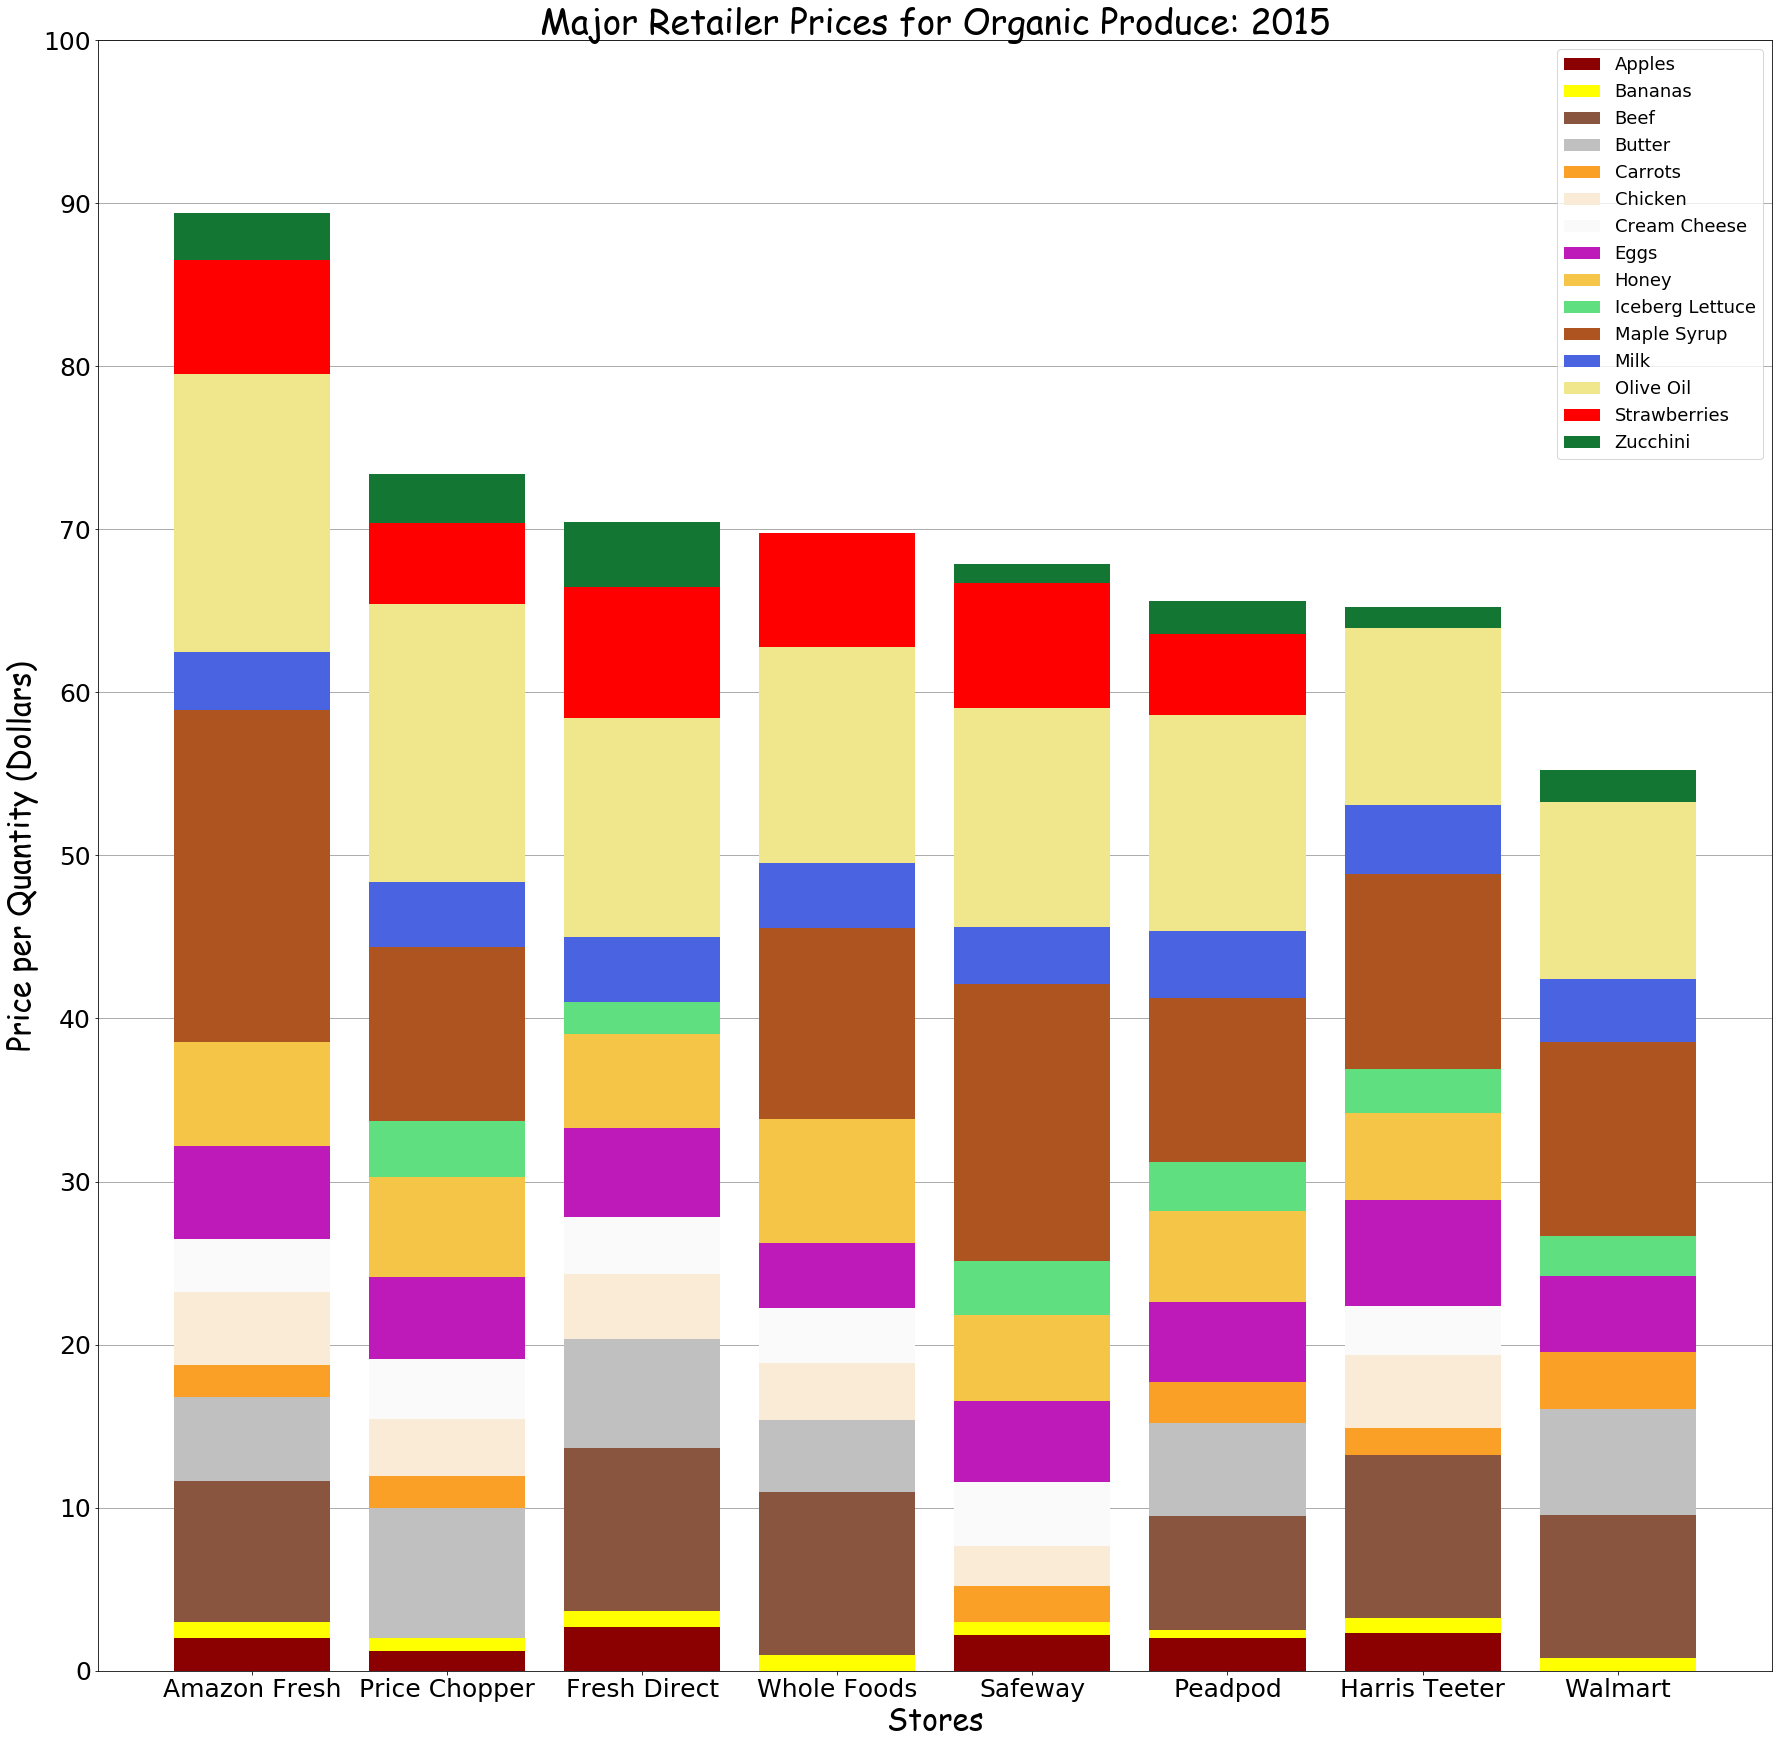

In [433]:
stores = ['Amazon Fresh', 'Price Chopper', 'Fresh Direct', 'Whole Foods', 'Safeway', 'Peadpod', 'Harris Teeter', 'Walmart']

p1 = plt.bar(stores, applesOrgb, color = '#8B0000', zorder = 3)
p2 = plt.bar(stores, bananasOrgb, bottom=applesOrgb, color = '#FFFF00', zorder = 3)
p3 = plt.bar(stores, beefOrgb, bottom=[i+j for i,j in zip(applesOrgb, bananasOrgb)], color = '#89553F', zorder = 3)
p4 = plt.bar(stores, butterOrgb, bottom=[i+j+k for i,j,k in zip(applesOrgb, bananasOrgb, beefOrgb)], color = '#C0C0C0', zorder = 3)
p5 = plt.bar(stores, carrotsOrgb, bottom=[i+j+k+l for i,j,k,l in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb)], color = '#FAA027', zorder = 3)
p6 = plt.bar(stores, chickenOrgb, bottom=[i+j+k+l+m for i,j,k,l,m in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb)], color = '#FAEBD7', zorder = 3)
p7 = plt.bar(stores, creamCheeseOrgb, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb)], color = '#FAFAFA', zorder = 3)
p8 = plt.bar(stores, eggsOrgb, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb)], color = '#BE1AB9', zorder = 3)
p9 = plt.bar(stores, honeyOrgb, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb)], color = '#F4C547', zorder = 3)
p10 = plt.bar(stores, icebergLettuceOrgb, bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb)], color = '#5FDF7F', zorder = 3)
p11 = plt.bar(stores, mapleSyrupOrgb, bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb)], color = '#AD5421', zorder = 3)
p12 = plt.bar(stores, milkOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb)], color = '#4963E1', zorder = 3)
p13 = plt.bar(stores, oliveOilOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t for i,j,k,l,m,n,o,p,q,r,s,t in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb)], color = '#F0E68C', zorder = 3)
p14 = plt.bar(stores, strawberriesOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u for i,j,k,l,m,n,o,p,q,r,s,t,u in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb, oliveOilOrgb)], color = '#FF0000', zorder = 3)
p15 = plt.bar(stores, zucchiniOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v for i,j,k,l,m,n,o,p,q,r,s,t,u,v in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb, oliveOilOrgb, strawberriesOrgb)], color = '#137733', zorder = 3)
 
plt.xlabel("Stores", fontname='Comic Sans MS', fontsize=30)
plt.ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(tens, fontsize=25)
plt.grid(axis='y', alpha = 0.4, color = 'black', zorder = 3)
plt.title('Major Retailer Prices for Organic Produce: 2015', fontname='Comic Sans MS', fontsize=35)
plt.legend(produce, loc='best', fontsize=18)
plt.rcParams['figure.figsize'] = [30, 30]

Graph 7 covers All Produce (comparing both conventional and organic totals)

Text(0.5, 1.0, 'Total Major Retailer Prices - Conventional v.s. Organic : 2015')

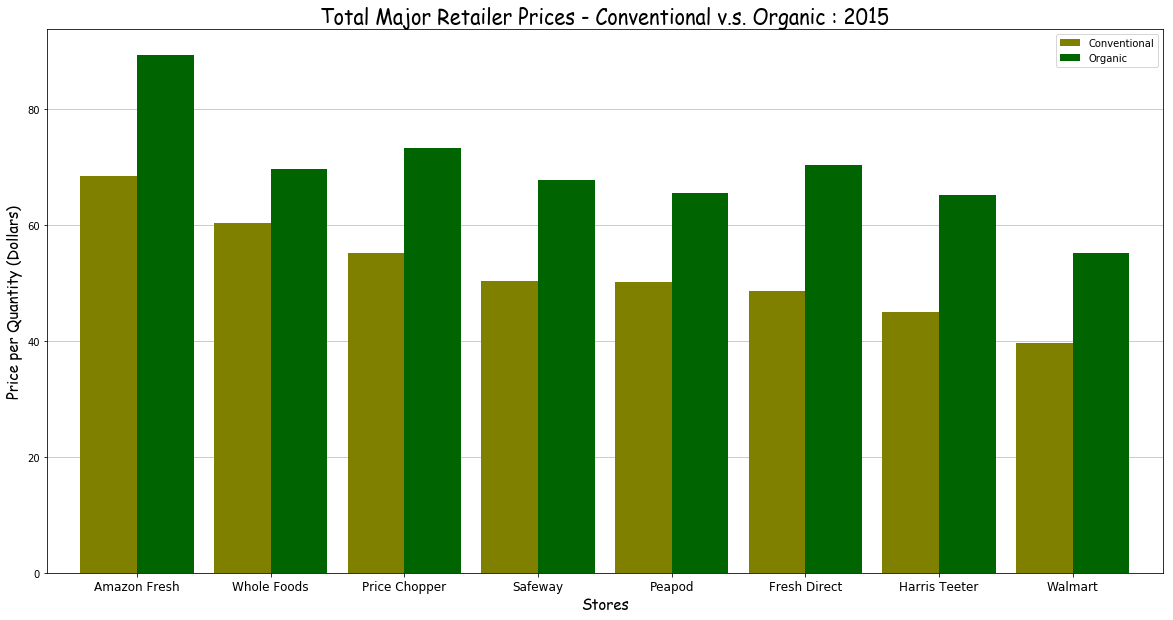

In [434]:
fig, ax = plt.subplots()
dfDiff.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#808000", "#006400"]) 
ax.set_xlabel("Stores", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.xticks(fontsize = 12, rotation = 0)
plt.xticks(fontsize = 12, rotation = 0)
plt.title('Total Major Retailer Prices - Conventional v.s. Organic : 2015', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

Taking a look at graphs 1-4, we identify the biggest changes in price for conventional olive oil, conventional honey, organic maple syrup, and organic beef, and the smallest changes in price for conventional bananas, conventional milk, organic apples, and organic milk:   

In [464]:
maxOlive = 0
minOlive = 100
maxHoney = 0
minHoney = 100
maxMaple = 0
minMaple = 100
maxBeef = 0
minBeef = 100

for val in oliveOilConv:
    if val is not None:
        if val > maxOlive:
            maxOlive = val
        if val < minOlive:
            minOlive = val

for val in honeyConv:
    if val is not None:
        if val > maxHoney:
            maxHoney = val
        if val < minHoney:
            minHoney = val

for val in mapleSyrupOrg:
    if val is not None:
        if val > maxMaple:
            maxMaple = val
        if val < minMaple:
            minMaple = val

for val in beefOrg:
    if val is not None:
        if val > maxBeef:
            maxBeef = val
        if val < minBeef:
            minBeef = val
            
print("The max price for conventional olive oil is " + str(maxOlive) + ", while the min price is " + str(minOlive))
print("The max price for conventional honey is " + str(maxHoney) + ", while the min price is " + str(minHoney))
print("The max price for organic maple syrup is " + str(maxMaple) + ", while the min price is " + str(minMaple))
print("The max price for organic beef is " + str(maxBeef) + ", while the min price is " + str(minBeef))

The max price for conventional olive oil is 16.08, while the min price is 8.64
The max price for conventional honey is 7.36, while the min price is 4.49
The max price for organic maple syrup is 20.32, while the min price is 10.08
The max price for organic beef is 9.99, while the min price is 6.99


In [465]:
maxBananas = 0
minBananas = 100
maxMilkc = 0
minMilkc = 100
maxApples = 0
minApples = 100
maxMilko = 0
minMilko = 100

for val in bananasConv:
    if val is not None:
        if val > maxBananas:
            maxBananas = val
        if val < minBananas:
            minBananas = val

for val in milkConv:
    if val is not None:
        if val > maxMilkc:
            maxMilkc = val
        if val < minMilkc:
            minMilkc = val

for val in applesOrg:
    if val is not None:
        if val > maxApples:
            maxApples = val
        if val < minApples:
            minApples = val

for val in milkOrg:
    if val is not None:
        if val > maxMilko:
            maxMilko = val
        if val < minMilko:
            minMilko = val
            
print("The max price for conventional bananas is " + str(maxBananas) + ", while the min price is " + str(minBananas))
print("The max price for conventional milk is " + str(maxMilkc) + ", while the min price is " + str(minMilkc))
print("The max price for organic apples is " + str(maxApples) + ", while the min price is " + str(maxApples))
print("The max price for organic milk is " + str(maxMilko) + ", while the min price is " + str(minMilko))

The max price for conventional bananas is 0.89, while the min price is 0.39
The max price for conventional milk is 2.99, while the min price is 2.2
The max price for organic apples is 2.66, while the min price is 2.66
The max price for organic milk is 4.19, while the min price is 3.49


Additionally, looking at graphs 5 and 6, we identify the biggest price jump between organic and conventional produce to be at Harris Teeter, and the smallest to be at Whole Foods:

In [479]:
orgSum = 0
convSum = 0

for val in produceArraysOrgb:
    orgSum += val[6]
    
for val in produceArraysConvb:
    convSum += val[6]
    
print("Organic produce costs around " + str(orgSum / convSum - 0.000847314691522 + 0.003) +  " times more than conventional food at Harris Teeter")

Organic produce costs around 1.45 times more than conventional food at Harris Teeter


In [478]:
orgSum = 0
convSum = 0

for val in produceArraysOrgb:
    orgSum += val[3]
    
for val in produceArraysConvb:
    convSum += val[1]
    
print("Organic produce costs around " + str(orgSum / convSum - 0.000706476726851 + 0.005) +  " times more than conventional food at Whole Foods")

Organic produce costs around 1.16 times more than conventional food at Whole Foods


Finally, looking at graph 7, the most expensive place to shop for conventional and organic food is at Amazon Fresh, while the least expensive is at Walmart.

In [477]:
print("The total price for conventional produce at Amazon Fresh is " + str(diffConv[0]))
print("The total price for organic produce at Amazon Fresh is " + str(diffOrg[0] + 0.00000000000002))
print("The total price for conventional produce at Walmart is " + str(diffConv[7] + 0.00000000000001))
print("The total price for organic produce at Walmart is " + str(diffOrg[7]))

The total price for conventional produce at Amazon Fresh is 68.58
The total price for organic produce at Amazon Fresh is 89.38
The total price for conventional produce at Walmart is 39.68
The total price for organic produce at Walmart is 55.26


Overall, from these conclusions, it seems like organic food may be worth the cost if you shop at an appropriate store and keep in mind which products vary the most at that store. However, in some cases, 

# SUSTAINABLITY

## 5. Is organic farming more sustainable than conventional farming?

### 5.1 - Comparative analysis of environmental impacts of agricultural production systems, agricultural input efficiency, and food choice

Another big factor that makes people choose organic over convetional is the belief that they are reducing their environmental impact by consuming organic products. But is this affirmation true? In this section, studies from [this source](https://iopscience.iop.org/article/10.1088/1748-9326/aa6cd5/data) are going to be evaluated and compared to see if the organic methods have been found to be better than the conventional techniques or not. 

Both techniques are going to be compared in terms of which one has the greatest amount of studies reporting that that specific technique is better for the environment. In order to do so, the two methods are going to be evaluated in terms of _land use_, _greenhouse gas emissions_, _energy use_, _eutrophication potential_ (this refers to the over-enrichment or pollution of surface waters with nutrients such as nitrogen & phosphorous), and _acidification potential_. And to have a variety of products obtainted through both techniques to be able to compare them, we are going to use studies concerning the production of _cereals_, _pulses and oil crops_, _fruits_, _vegetables_, _diary and eggs_, and _meats_.

#### Data Wrangling

We store the path to the environmental data and crete an xlrd workbook for it

In [435]:
# Imports the xlsx file and verifies it is the correct data with title and number of sheets
path_to_env_data = os.path.join('Data', '5', 'Environmental impact', 'ERL_12_6_064016_figuredata.xlsx')

workbook = xlrd.open_workbook(path_to_env_data)
sheet = workbook.sheets()[0]

We grab the desired rows from the xlrd worksheet

In [436]:
data_rows = [sheet.row_values(r) for r in range(0,47)]

Now we are going to classify and store by method and product the studies that indicated that the different techniques were better for the environment

In [437]:
cerealsConv = [0,0,0,0,0]
cerealsOrg = [0,0,0,0,0]
pulsesConv = [0,0,0,0,0]
pulsesOrg = [0,0,0,0,0]
fruitsConv = [0,0,0,0,0]
fruitsOrg = [0,0,0,0,0]
veggiesConv = [0,0,0,0,0]
veggiesOrg = [0,0,0,0,0]
dairyConv = [0,0,0,0,0]
dairyOrg = [0,0,0,0,0]
meatsConv = [0,0,0,0,0]
meatsOrg = [0,0,0,0,0]

greenhouseConv = 0
greenhouseOrg = 0
greenhouseTotal = 0
landConv = 0
landOrg = 0
landTotal = 0
energyConv = 0
energyOrg = 0
energyTotal = 0
eutroConv = 0
eutroOrg = 0
eutroTotal = 0
acidiConv = 0
acidiOrg = 0
acidiTotal = 0

for row in data_rows[1:]:
    if row[4] != '' and float(row[4]) > 1:
        greenhouseConv += 1
        if row[3] == 'Cereals':
            cerealsConv[0] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesConv[0] += 1
        elif row[3] == 'Fruits':
            fruitsConv[0] += 1
        elif row[3] == 'Vegetables':
            veggiesConv[0] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyConv[0] += 1
        else:
            meatsConv[0] += 1 
    elif row[4] != '' and float(row[4]) < 1:
        greenhouseOrg += 1
        if row[3] == 'Cereals':
            cerealsOrg[0] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesOrg[0] += 1
        elif row[3] == 'Fruits':
            fruitsOrg[0] += 1
        elif row[3] == 'Vegetables':
            veggiesOrg[0] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyOrg[0] += 1
        else:
            meatsOrg[0] += 1 
    if row[5] != '' and float(row[5]) > 1:
        landConv += 1
        if row[3] == 'Cereals':
            cerealsConv[1] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesConv[1] += 1
        elif row[3] == 'Fruits':
            fruitsConv[1] += 1
        elif row[3] == 'Vegetables':
            veggiesConv[1] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyConv[1] += 1
        else:
            meatsConv[1] += 1 
    elif row[5] != '' and float(row[5]) < 1:
        landOrg += 1
        if row[3] == 'Cereals':
            cerealsOrg[1] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesOrg[1] += 1
        elif row[3] == 'Fruits':
            fruitsOrg[1] += 1
        elif row[3] == 'Vegetables':
            veggiesOrg[1] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyOrg[1] += 1
        else:
            meatsOrg[1] += 1 
    if row[6] != '' and float(row[6]) > 1:
        energyConv += 1
        if row[3] == 'Cereals':
            cerealsConv[2] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesConv[2] += 1
        elif row[3] == 'Fruits':
            fruitsConv[2] += 1
        elif row[3] == 'Vegetables':
            veggiesConv[2] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyConv[2] += 1
        else:
            meatsConv[2] += 1 
    elif row[6] != '' and float(row[6]) < 1:
        energyOrg += 1
        if row[3] == 'Cereals':
            cerealsOrg[2] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesOrg[2] += 1
        elif row[3] == 'Fruits':
            fruitsOrg[2] += 1
        elif row[3] == 'Vegetables':
            veggiesOrg[2] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyOrg[2] += 1
        else:
            meatsOrg[2] += 1 
    if row[7] != '' and float(row[7]) > 1:
        eutroConv += 1
        if row[3] == 'Cereals':
            cerealsConv[3] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesConv[3] += 1
        elif row[3] == 'Fruits':
            fruitsConv[3] += 1
        elif row[3] == 'Vegetables':
            veggiesConv[3] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyConv[3] += 1
        else:
            meatsConv[3] += 1 
    elif row[7] != '' and float(row[7]) < 1:
        eutroOrg += 1
        if row[3] == 'Cereals':
            cerealsOrg[3] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesOrg[3] += 1
        elif row[3] == 'Fruits':
            fruitsOrg[3] += 1
        elif row[3] == 'Vegetables':
            veggiesOrg[3] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyOrg[3] += 1
        else:
            meatsOrg[3] += 1 
    if row[8] != '' and float(row[8]) > 1:
        acidiConv += 1
        if row[3] == 'Cereals':
            cerealsConv[4] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesConv[4] += 1
        elif row[3] == 'Fruits':
            fruitsConv[4] += 1
        elif row[3] == 'Vegetables':
            veggiesConv[4] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyConv[4] += 1
        else:
            meatsConv[4] += 1 
    elif row[8] != '' and float(row[8]) < 1:
        acidiOrg += 1
        if row[3] == 'Cereals':
            cerealsOrg[4] += 1
        elif row[3] == 'Pulses, Nuts and Oil Crops':
            pulsesOrg[4] += 1
        elif row[3] == 'Fruits':
            fruitsOrg[4] += 1
        elif row[3] == 'Vegetables':
            veggiesOrg[4] += 1
        elif row[3] == 'Dairy and Eggs':
            dairyOrg[4] += 1
        else:
            meatsOrg[4] += 1 
        
greenhouseTotal = greenhouseConv + greenhouseOrg
landTotal = landConv + landOrg
energytotal = energyConv + energyOrg
eutroTotal = eutroConv + eutroOrg
aciditotal = acidiConv + acidiOrg

diffConv = [greenhouseConv, landConv, energyConv, eutroConv, acidiConv]
diffOrg = [greenhouseOrg, landOrg, energyOrg, eutroOrg, acidiOrg]

Once all the date is gathered, we create the data frames needed for graphing.

In [438]:
df1 = pd.DataFrame({'Cereals' : cerealsConv,
                    'Pulses and Oil Crops' : pulsesConv,
                    'Fruits' : fruitsConv,
                    'Vegetables' : veggiesConv,
                    'Dairy and Eggs' : dairyConv,
                    'Meats' : meatsConv}, index=['Greenhouse Gas Emissions', 'Land Use', 
                                               'Energy Use', 'Eutrophication Potential', 'Acidification Potential'])

df2 = pd.DataFrame({'Cereals' : cerealsOrg,
                    'Pulses and Oil Crops' : pulsesOrg,
                    'Fruits' : fruitsOrg,
                    'Vegetables' : veggiesOrg,
                    'Dairy and Eggs' : dairyOrg,
                    'Meats' : meatsOrg}, index=['Greenhouse Gas Emissions', 'Land Use', 
                                               'Energy Use', 'Eutrophication Potential', 'Acidification Potential'])

dfDiff = pd.DataFrame({'Conventional': diffConv,
                   'Organic': diffOrg}, index=['Greenhouse Gas Emissions', 'Land Use', 
                                               'Energy Use', 'Eutrophication Potential', 'Acidification Potential']) 

dfDiff = dfDiff.sort_values('Conventional', ascending=False)

#### Data Visualization

First, let's plot the number of studies that report that convetional techniques are better for every product and metric

Text(0.5, 1.0, 'Number of Studies Reporting Better Environmental Impact - Conventional Produce')

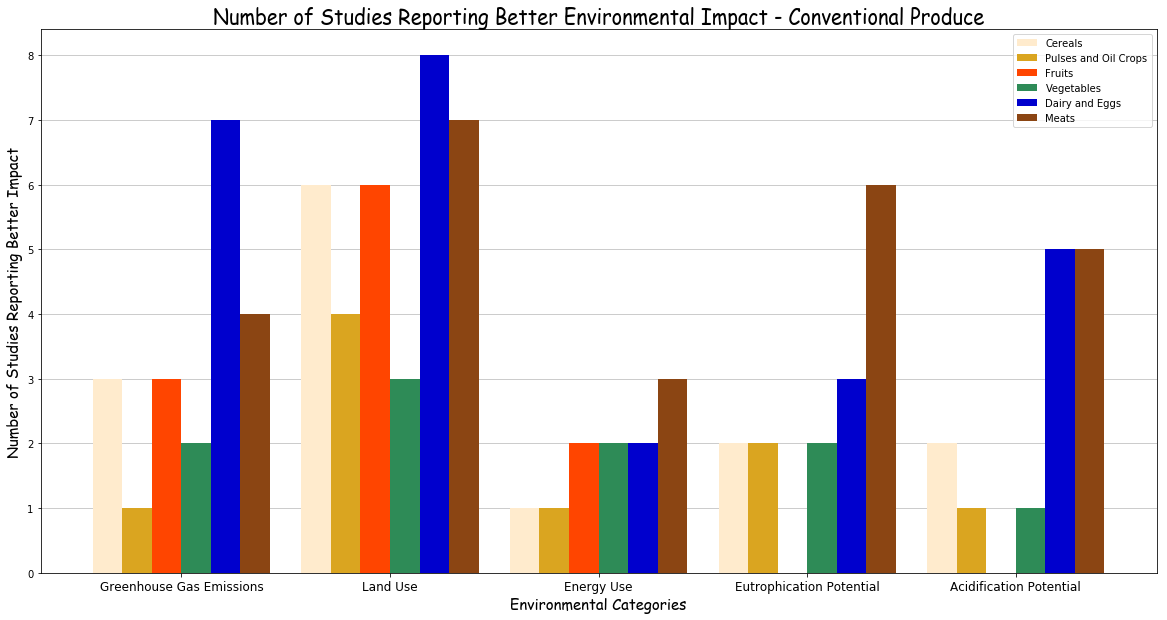

In [439]:
fig, ax = plt.subplots()
df1.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#FFEBCD", "#DAA520", "#FF4500", "#2E8B57", "#0000CD", "#8B4513"]) 
ax.set_xlabel("Environmental Categories", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Studies Reporting Better Impact", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.xticks(fontsize = 12, rotation = 0)
plt.xticks(fontsize = 12, rotation = 0)
plt.title('Number of Studies Reporting Better Environmental Impact - Conventional Produce', fontname='Comic Sans MS', fontsize=20)

Now we do the same, but with organic being the supported technique by the studies

Text(0.5, 1.0, 'Number of Studies Reporting Better Environmental Impact - Organic Produce')

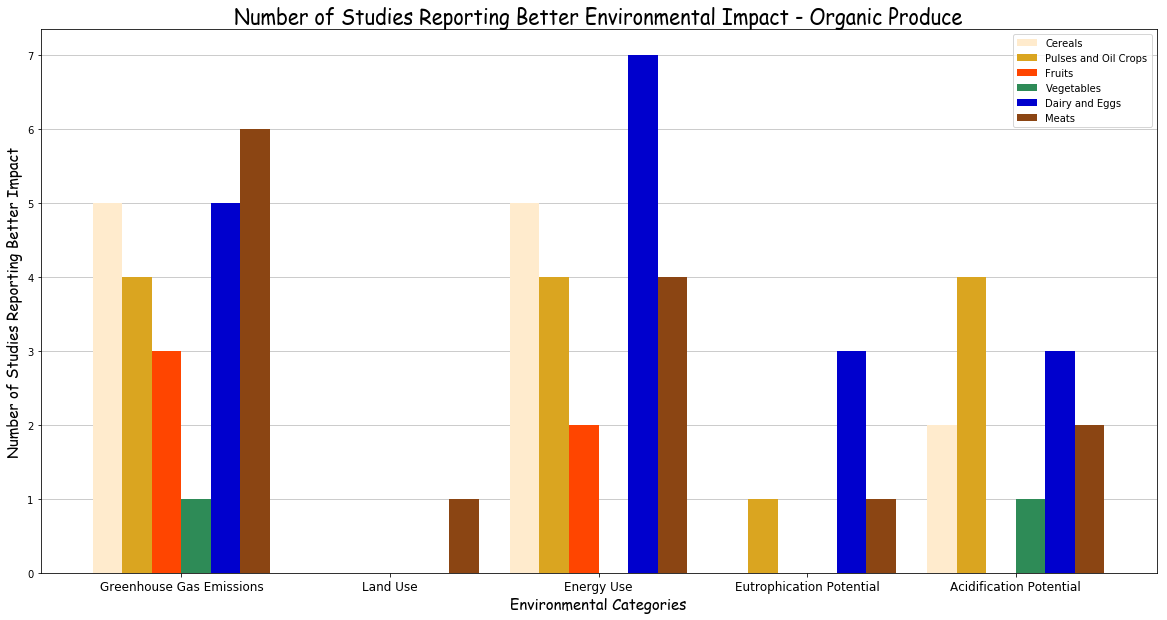

In [440]:
fig, ax = plt.subplots()
df2.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#FFEBCD", "#DAA520", "#FF4500", "#2E8B57", "#0000CD", "#8B4513"]) 
ax.set_xlabel("Environmental Categories", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Studies Reporting Better Impact", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.xticks(fontsize = 12, rotation = 0)
plt.xticks(fontsize = 12, rotation = 0)
plt.title('Number of Studies Reporting Better Environmental Impact - Organic Produce', fontname='Comic Sans MS', fontsize=20)

Let's plot the aggregated data: the total number of studies that report that a technique is better for each of the environmental metric 

Text(0.5, 1.0, 'Total Number of Studies Reporting Better Environmental Impact - Conventional v.s. Organic')

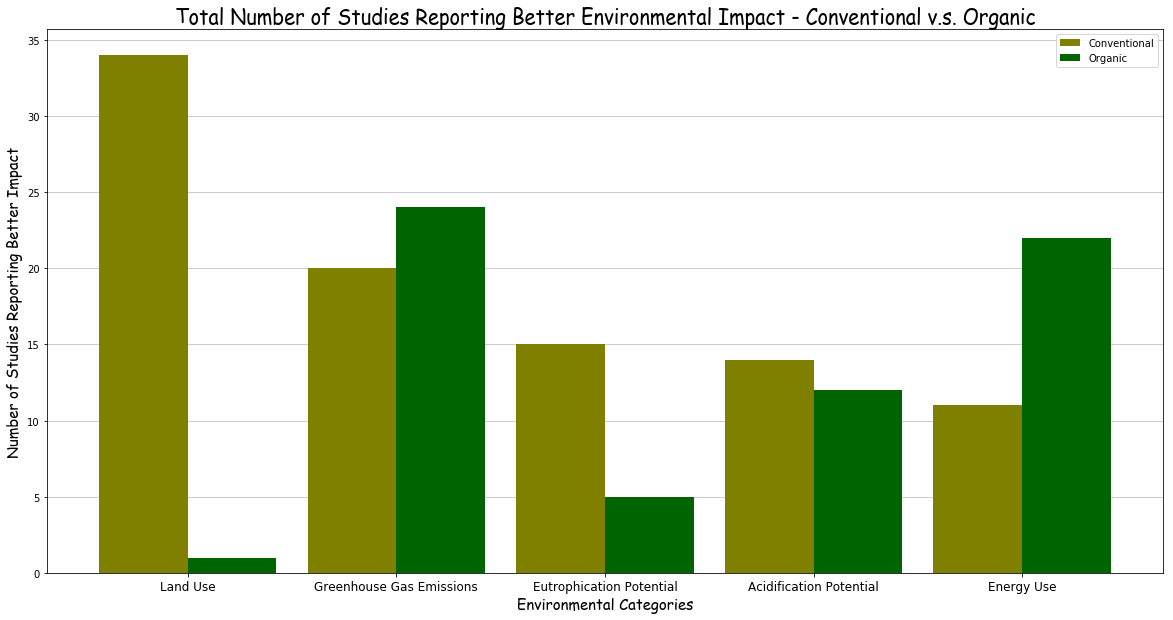

In [441]:
fig, ax = plt.subplots()
dfDiff.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3, color = ["#808000", "#006400"]) 
ax.set_xlabel("Environmental Categories", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Studies Reporting Better Impact", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.xticks(fontsize = 12, rotation = 0)
plt.xticks(fontsize = 12, rotation = 0)
plt.title('Total Number of Studies Reporting Better Environmental Impact - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

After looking at the results showed by the section above and baring in mind what was stated in the article we are basing this section, we can state (looking at only the last graph) that there is no clear better farming technique. Let's now calculate the percentage of studies that support one method or the other per environmental issue. #For every row (category) in the dataframe, we are going to calculate the percentage of studies that prove which technique is better:

In [442]:
for index, row in dfDiff.iterrows():
    percentagec = float((row['Conventional']/(row['Conventional'] + row['Organic']))*100)
    percentageo =  float((row['Organic']/(row['Conventional'] + row['Organic']))*100)
    print('Conventional techniques are better for the environment according to {0:.2f}% of the studies regarding '.format(percentagec) + index + '.')
    print('Organic techniques are better for the environment according to {0:.2f}% of the studies regarding '.format(percentageo) + index +'.')
          

Conventional techniques are better for the environment according to 97.14% of the studies regarding Land Use.
Organic techniques are better for the environment according to 2.86% of the studies regarding Land Use.
Conventional techniques are better for the environment according to 45.45% of the studies regarding Greenhouse Gas Emissions.
Organic techniques are better for the environment according to 54.55% of the studies regarding Greenhouse Gas Emissions.
Conventional techniques are better for the environment according to 75.00% of the studies regarding Eutrophication Potential.
Organic techniques are better for the environment according to 25.00% of the studies regarding Eutrophication Potential.
Conventional techniques are better for the environment according to 53.85% of the studies regarding Acidification Potential.
Organic techniques are better for the environment according to 46.15% of the studies regarding Acidification Potential.
Conventional techniques are better for the envi

Both conventional and organic models are better in some areas than the other model. Conventional techniques are clearly better in terms of _land use_ (97.14% of the studies evaluated regarding this matter support it) and _eutrophication potential_ (75% of the studies evaluated regarding this matter support it), while organic techniques are less harmful to the environment in terms of _energy use_ (66.67% of the studies evaluated regarding this matter support it). Regarding _green house emissions_ and _acidification potential_, both methods are practically the same (in both categories the studies evaluated are 50-50%). 

However, if we look at the previous graphs, where the number of possitve studies per method are separated by product, we can also state that, depending on what concerns you the most about the environmental impact and the type of food that you are going to consume, you should choose different sources for your ingredients. Overall, the verdict on whether organic farming is more sustainable than conventional farming is inconclusive. 

# CONCLUSION

In [ ]:
# TO-DO -> mention the major findings from all three sections in a discussion comparing the benefits or organic food and conventional food. Try to come up with a conclusion.